In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

In [2]:
wine = pd.read_csv('wine.csv')

In [5]:
X = wine.as_matrix()[:,1:]
y = wine.as_matrix(['class'])

In [7]:
def check_range(X):
    res = []
    for i in range(X.shape[1]):
        res.append(X[:,i].max() - X[:,i].min())
    print(min(res), max(res))

In [8]:
check_range(X) # 0.53, 1402.0 => we need to normalize features

0.53 1402.0


In [9]:
X = X / (X.max(axis=0) - X.min(axis=0))

In [10]:
check_range(X)

1.0 1.0


In [11]:
def train_test_split(X, y, ratio=0.8):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    l = int(X.shape[0] * ratio)
    return X[indices[:l]], y[indices[:l]], X[indices[l:]], y[indices[l:]]

In [12]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [15]:
euclidian_distance = lambda a, b: np.linalg.norm(a-b)
manhattan_distance = lambda a, b: np.sum(np.abs((a-b)))

In [11]:
def knn(X_train, y_train, X_test, k, dist):
    # calculate for each sample from test distances to all samples from train
    distances = np.apply_along_axis(lambda y: np.apply_along_axis(lambda x: dist(y, x), 1, X_train), 1, X_test)
    sorted_distances_indices = np.apply_along_axis(np.argsort, 1, distances)
    
    # classes of k nearest neighbors for each sample from test
    neighbors = y_train[sorted_distances_indices][:,:k].reshape((X_test.shape[0], k))
    
    return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), 1, neighbors).reshape((X_test.shape[0],1))

In [12]:
def loocv(X_train, y_train, dist):

    num_classes = len(np.unique(y_train))
    samples_in_classes = np.bincount(y_train.flatten())
    samples_in_smallest_class = np.min(samples_in_classes[np.nonzero(samples_in_classes)])
    
    indices = np.arange(X_train.shape[0])
    possible_k = np.arange(num_classes * samples_in_smallest_class) + 1
    
    loo = np.zeros(possible_k[-1])

    for i in indices:
        X_without_sample = np.concatenate((X[:i], X[i+1:]))
        y_without_sample = np.concatenate((y[:i], y[i+1:]))
        sample = X_train[i].reshape(1, X_train.shape[1])

        for k in possible_k:
            loo[k-1] += (knn(X_without_sample, y_without_sample, sample, k, dist) != y_train[i])
    
    return np.argmin(loo) + 1

In [13]:
euclidian_opt_k = loocv(X_train, y_train, euclidian_distance)
manhattan_opt_k = loocv(X_train, y_train, manhattan_distance)

In [14]:
euclidian_opt_k, manhattan_opt_k

(1, 1)

In [23]:
y_pred_euclidian = knn(X_train, y_train, X_test, euclidian_opt_k, euclidian_distance)
y_pred_manhattan = knn(X_train, y_train, X_test, manhattan_opt_k, manhattan_distance)

In [24]:
def print_precision_recall(y_pred, y_test):
    classes = np.unique(y_test)
    correct = y_pred[y_test == y_pred]
    incorrect = y_pred[y_test != y_pred]

    for c in range(len(classes)):

        tp = len(correct[correct == classes[c]])
        fp = len(incorrect[incorrect == classes[c]])
        fn = len(incorrect) - fp
        
        print(classes[c], tp / (tp + fp), tp / (tp + fn))

In [25]:
print("For euclidian distance: ")
print_precision_recall(y_pred_euclidian, y_test)
print("For manhattan distance: ")
print_precision_recall(y_pred_manhattan, y_test)

For euclidian distance: 
1 1.0 1.0
2 1.0 1.0
3 1.0 1.0
For manhattan distance: 
1 1.0 1.0
2 1.0 1.0
3 1.0 1.0


In [8]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

C:\Soft\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


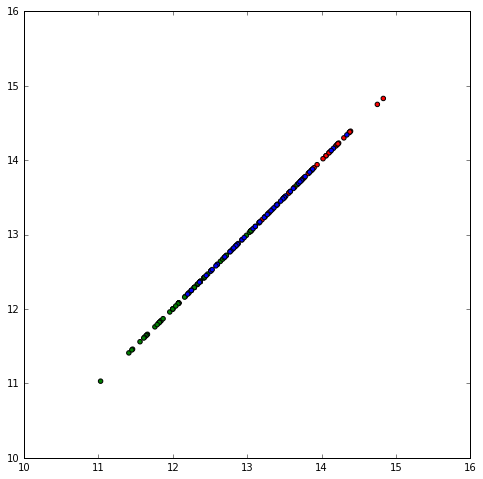

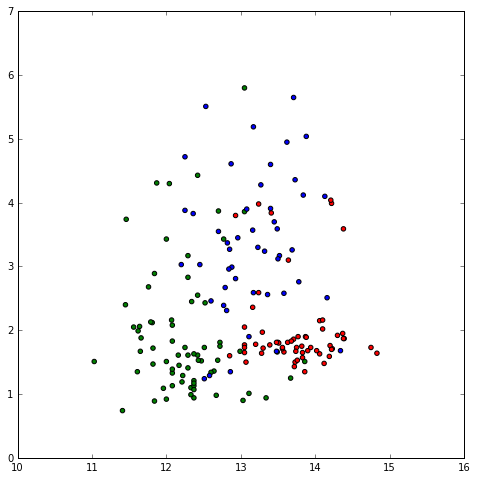

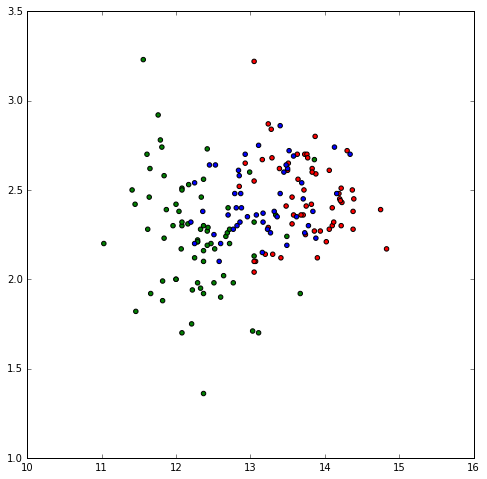

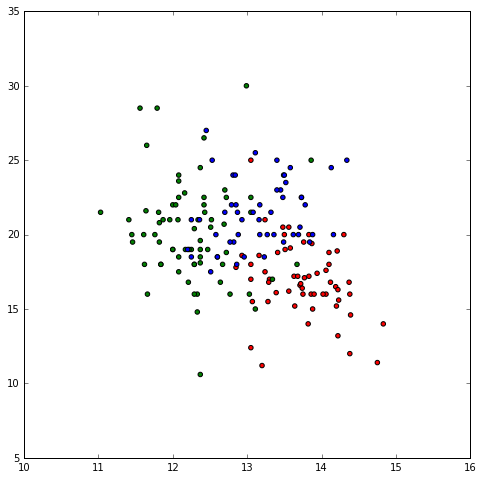

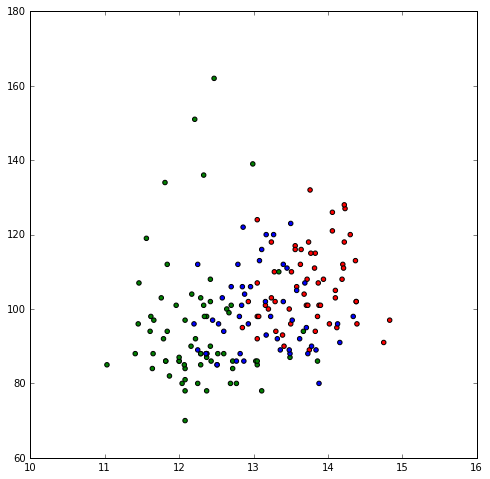

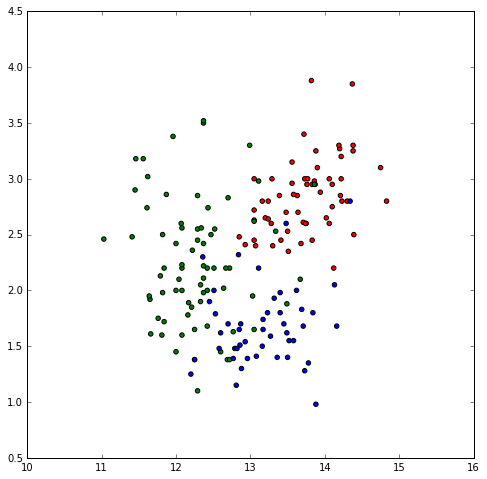

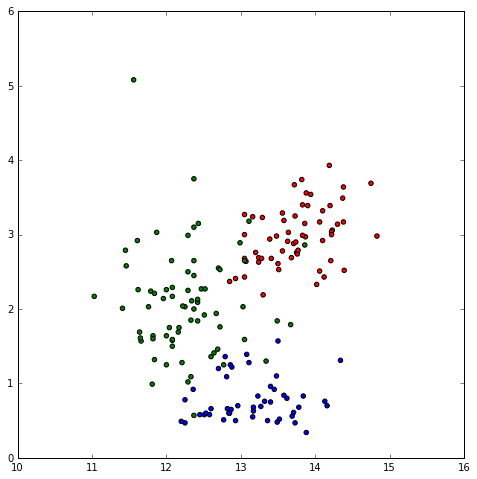

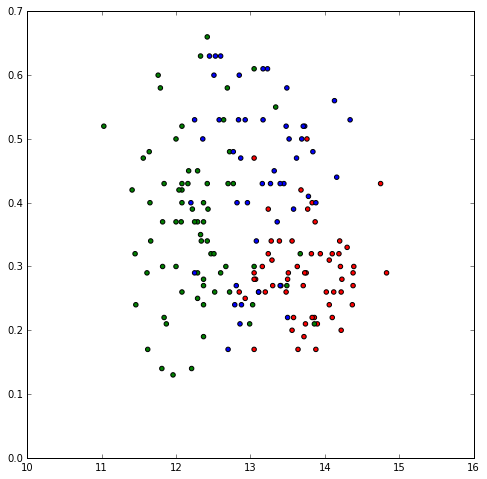

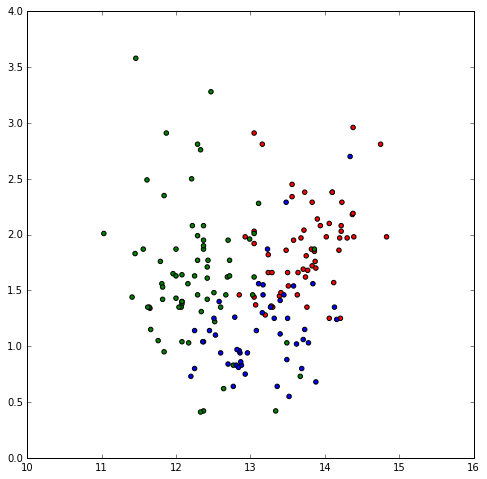

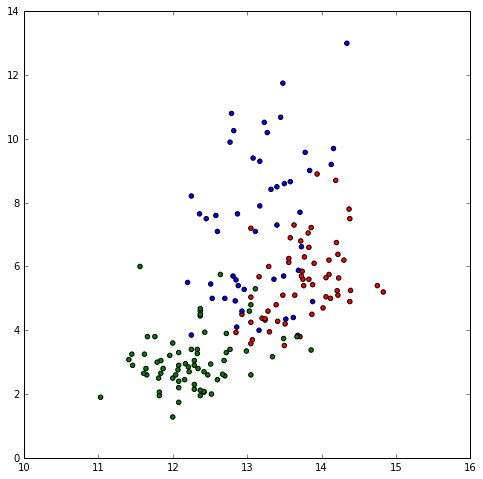

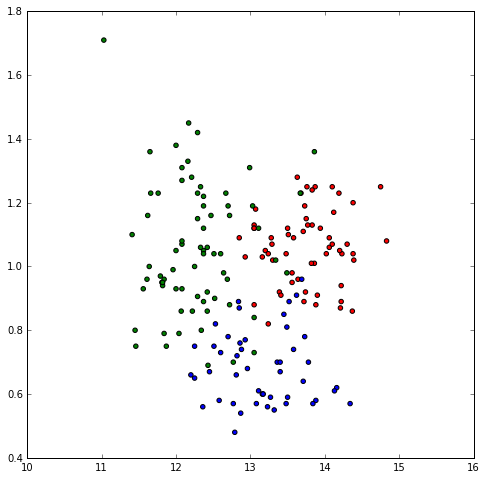

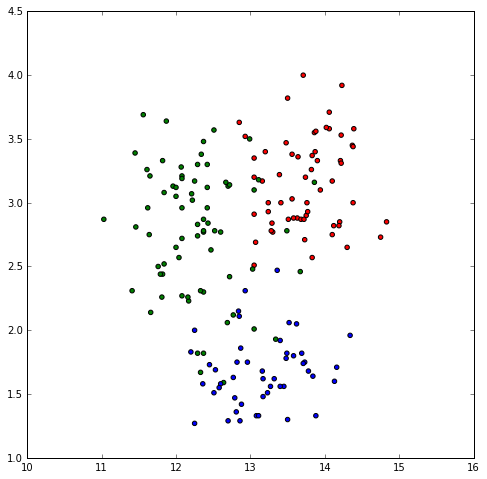

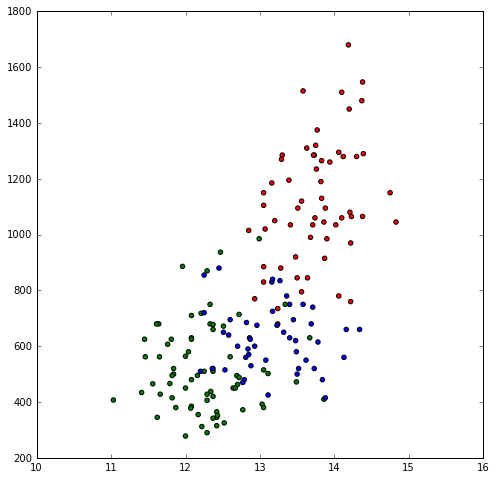

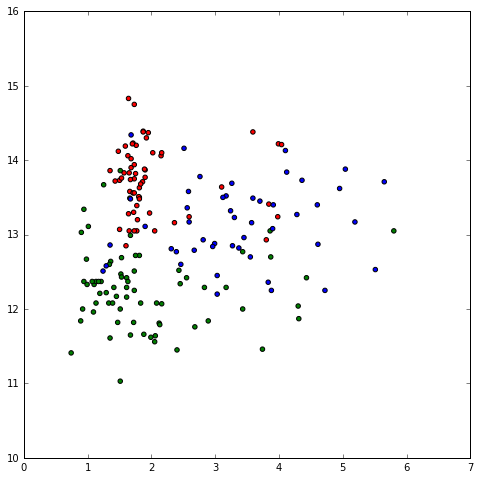

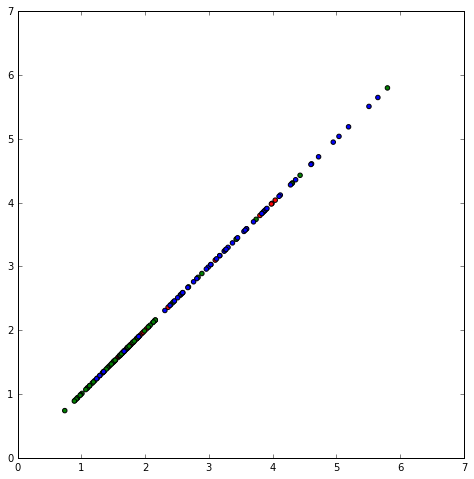

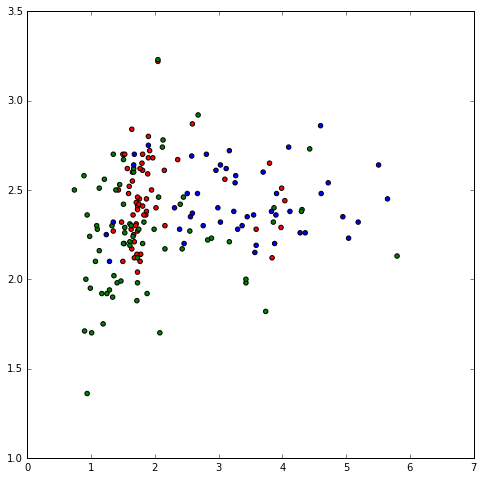

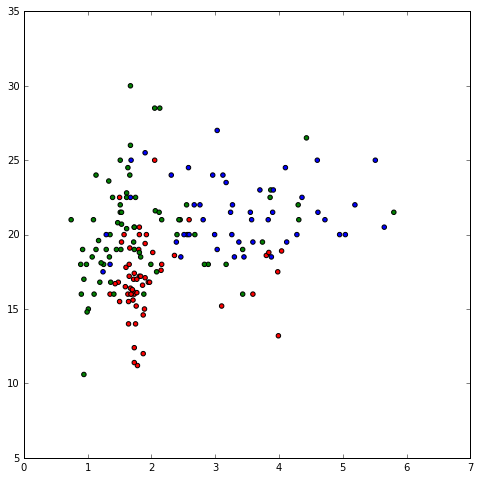

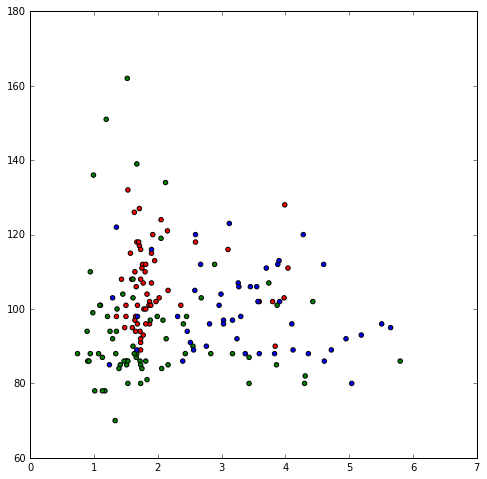

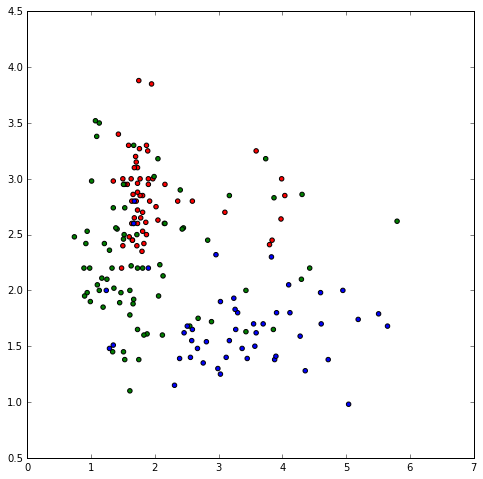

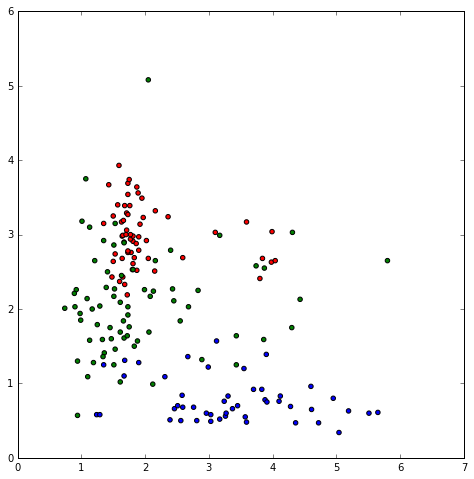

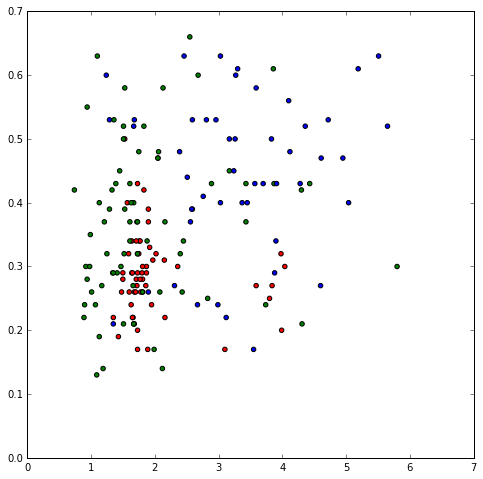

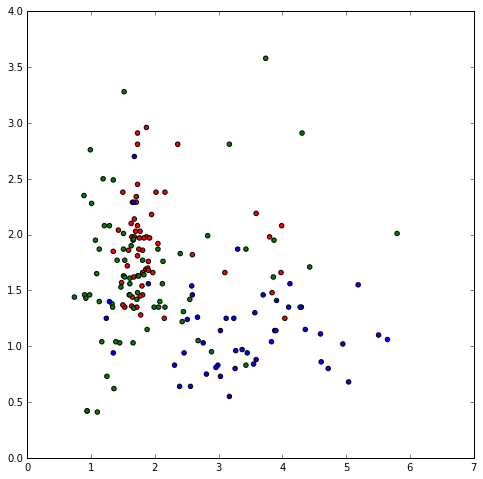

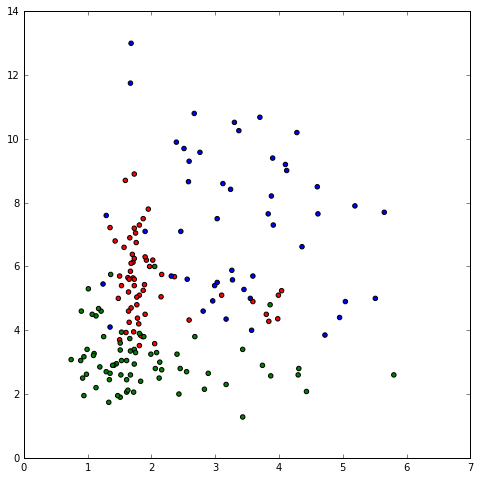

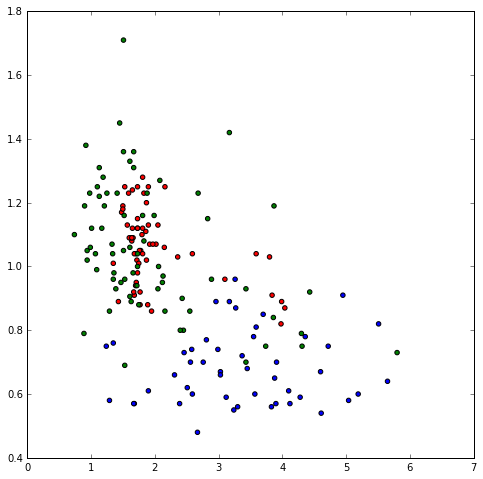

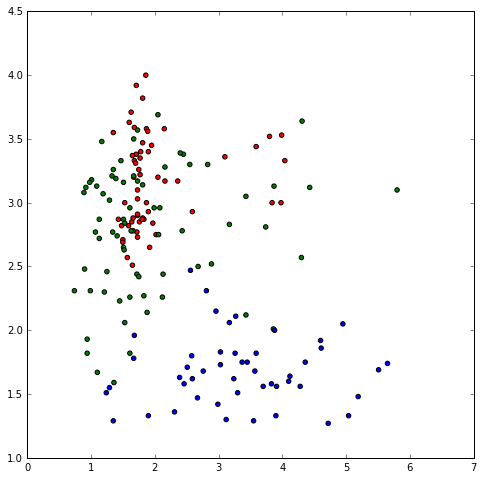

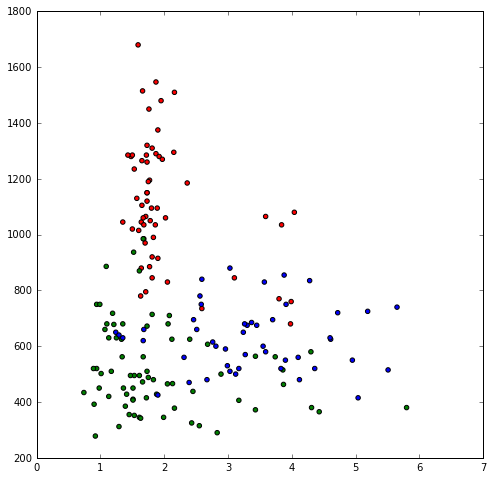

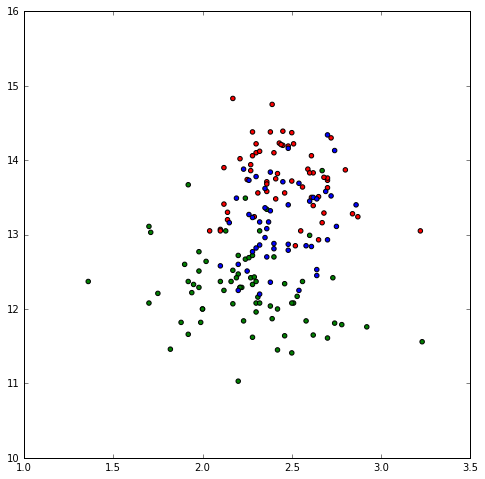

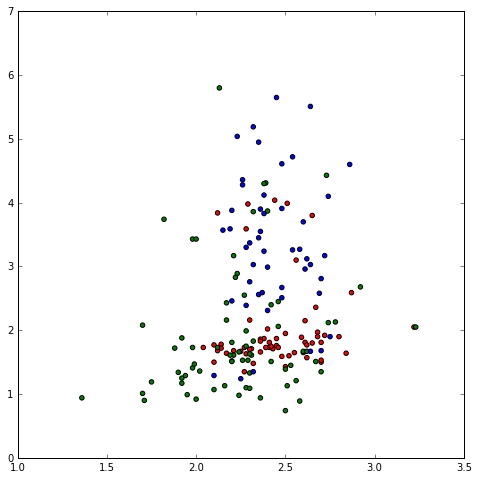

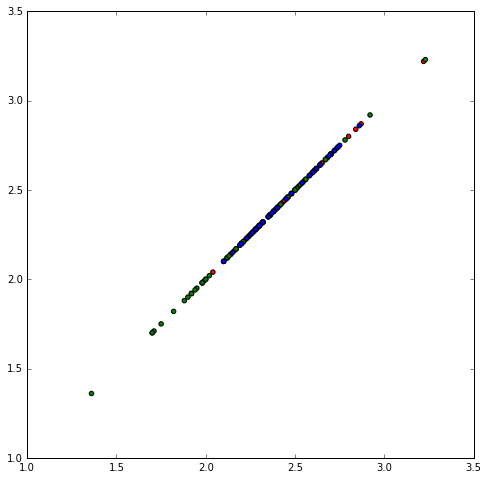

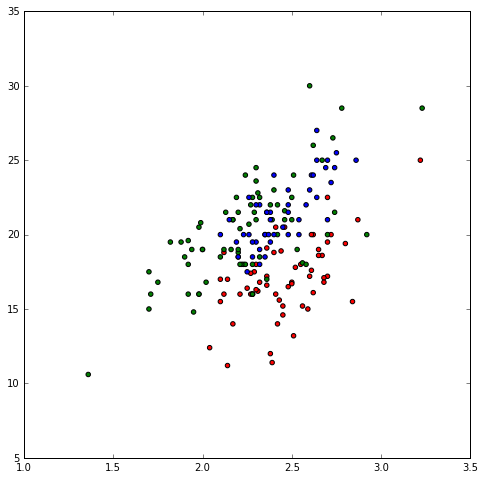

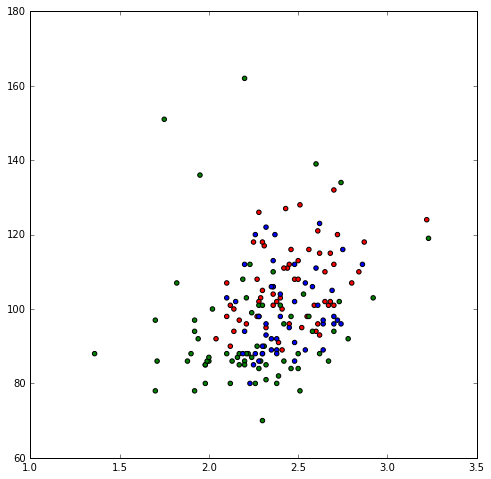

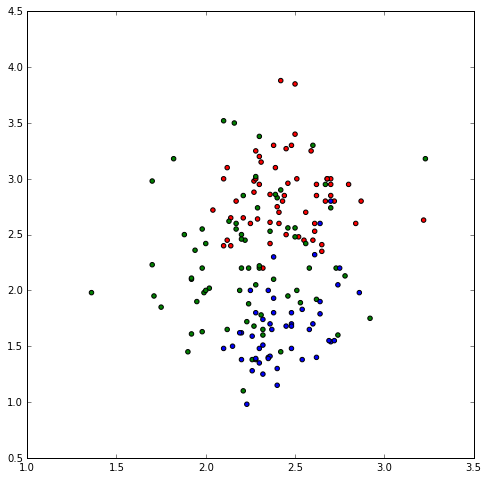

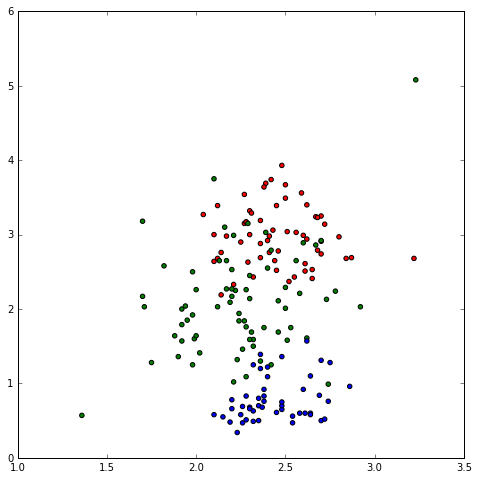

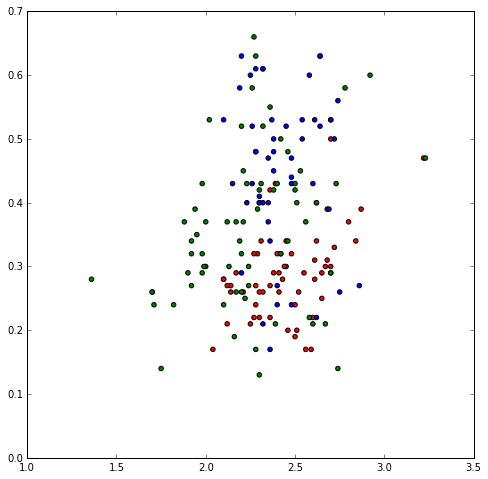

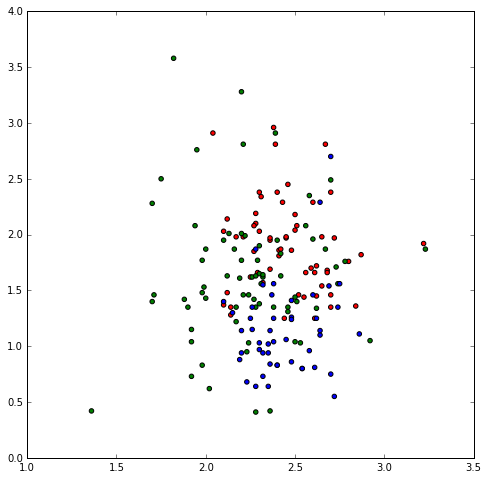

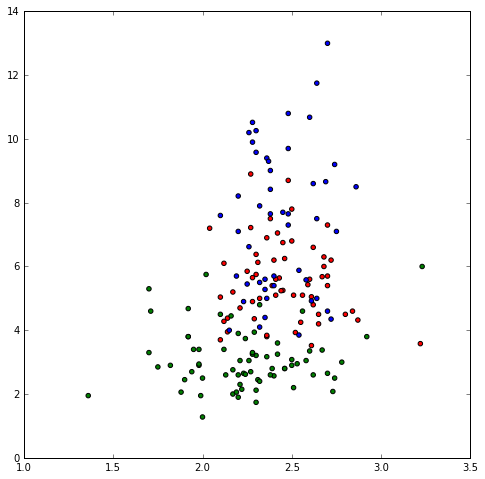

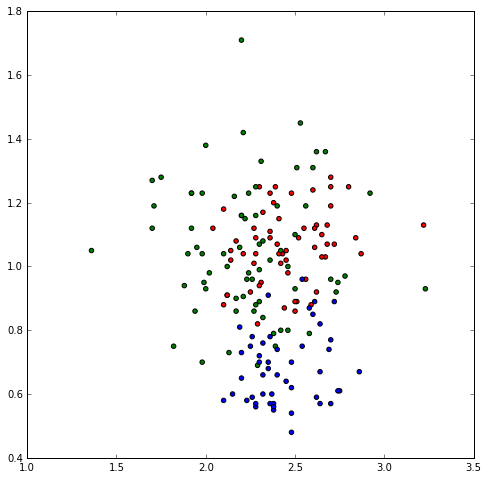

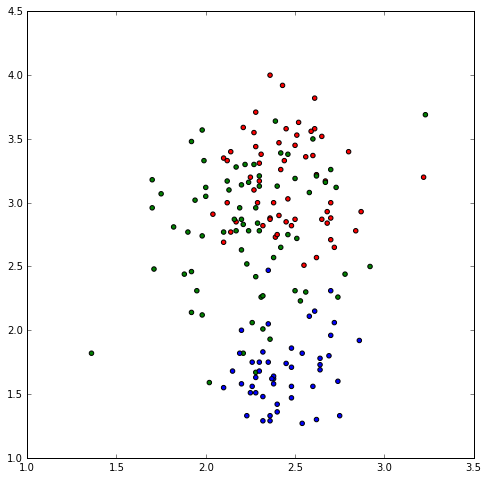

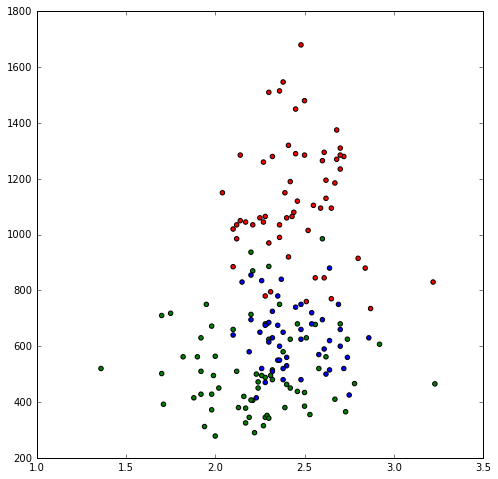

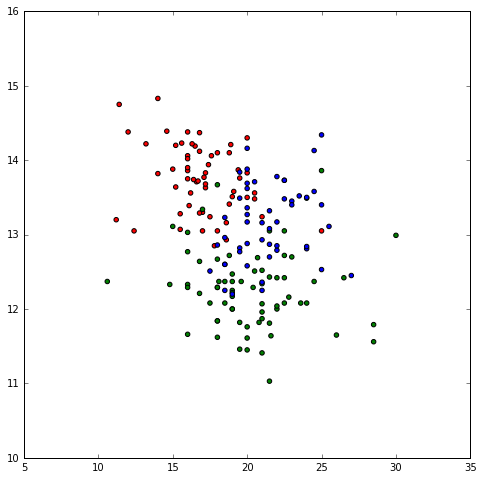

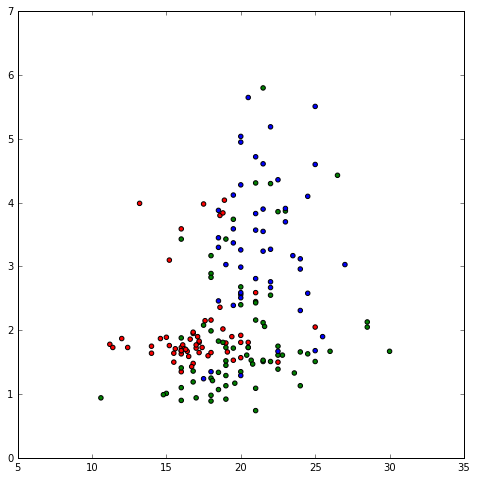

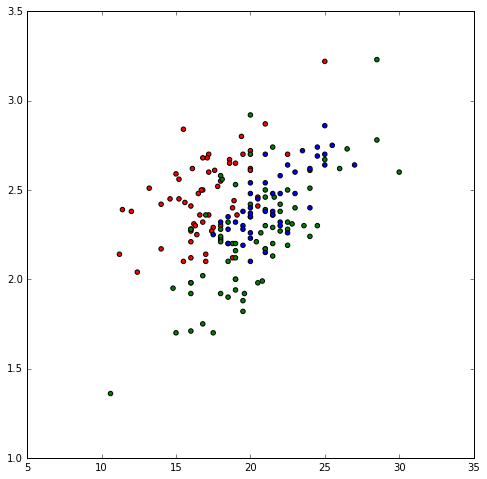

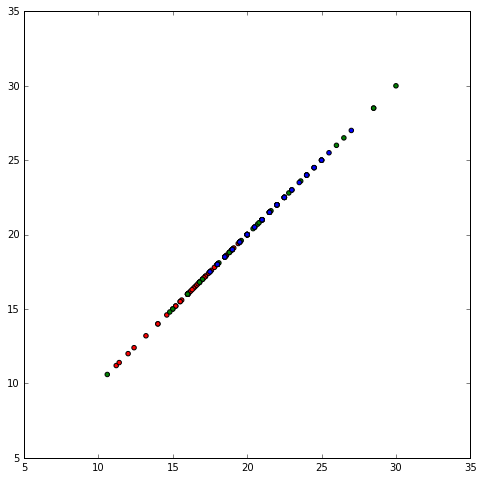

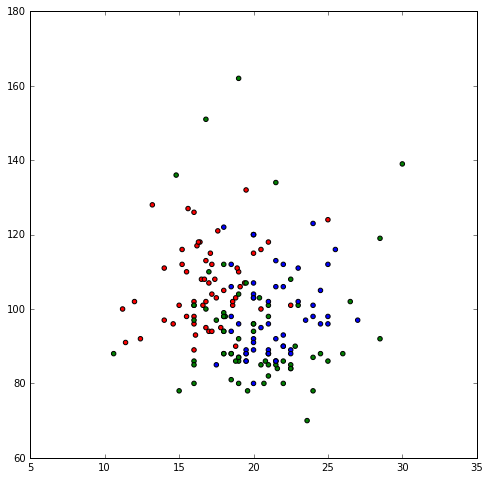

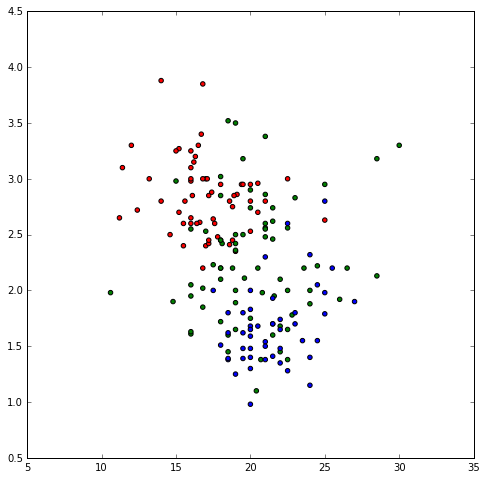

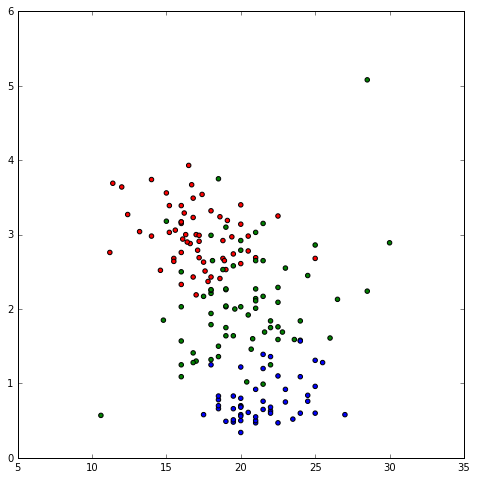

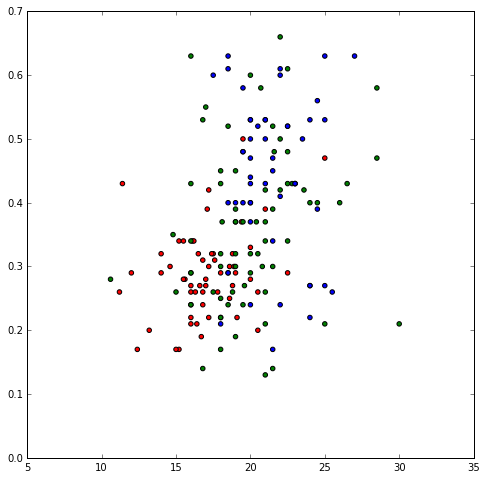

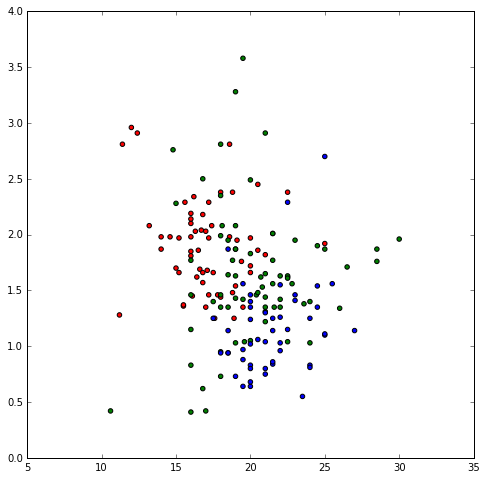

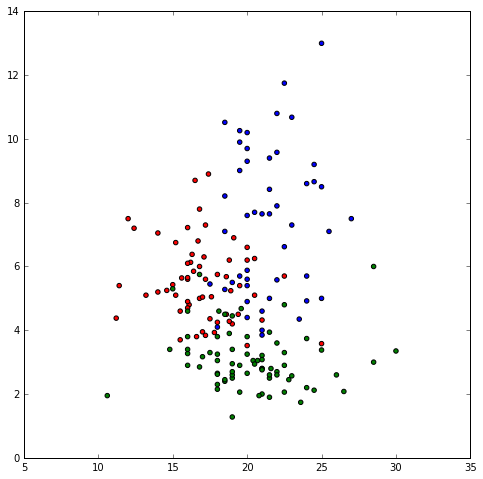

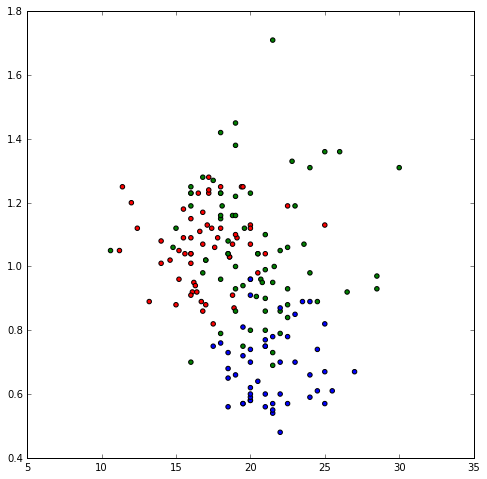

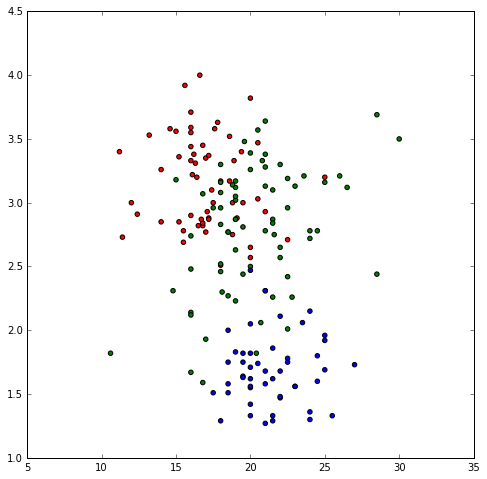

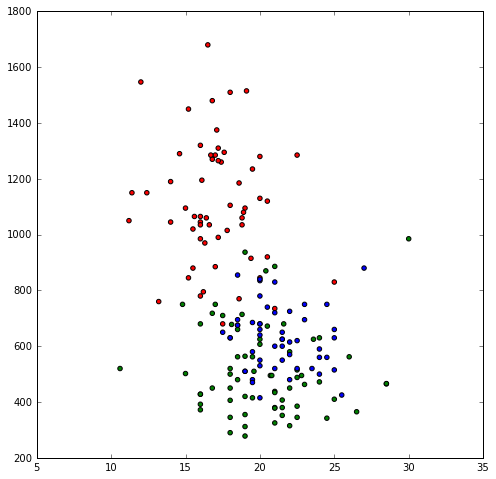

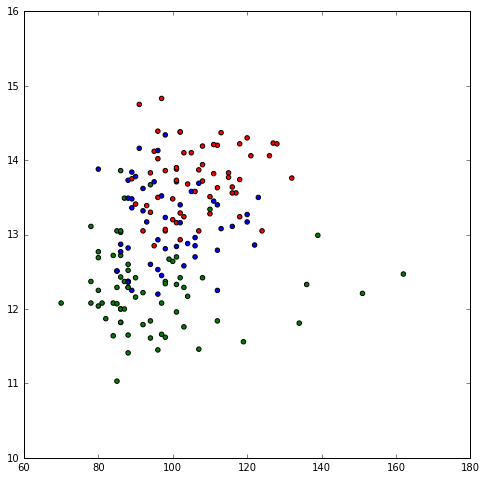

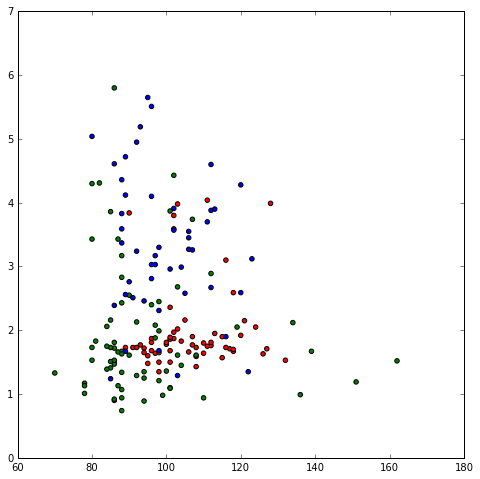

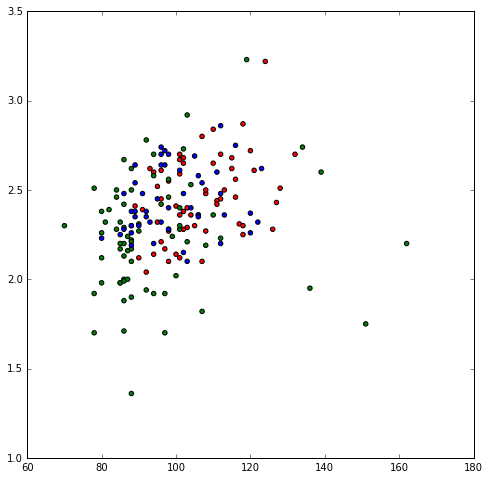

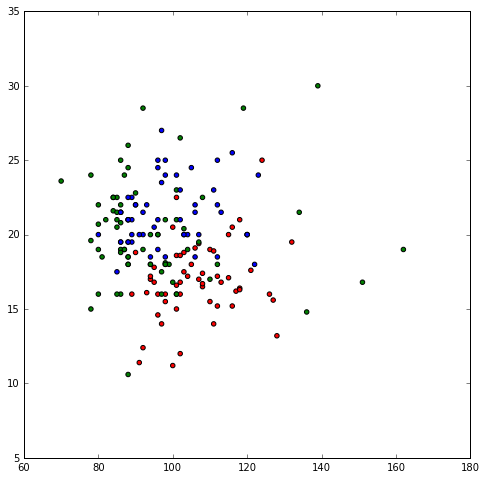

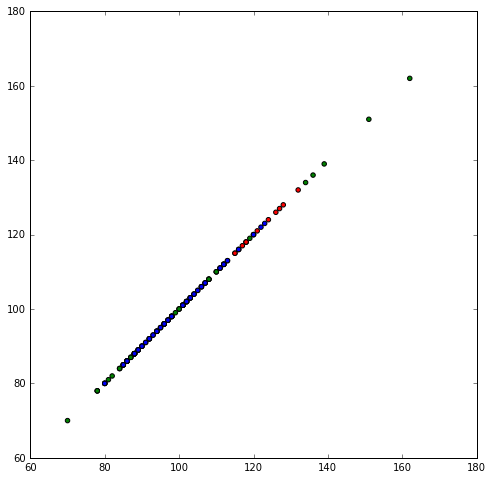

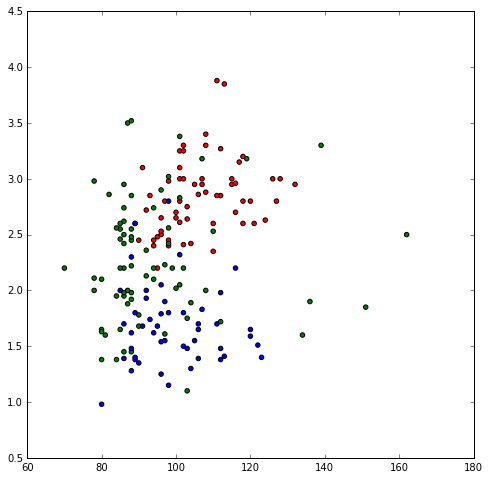

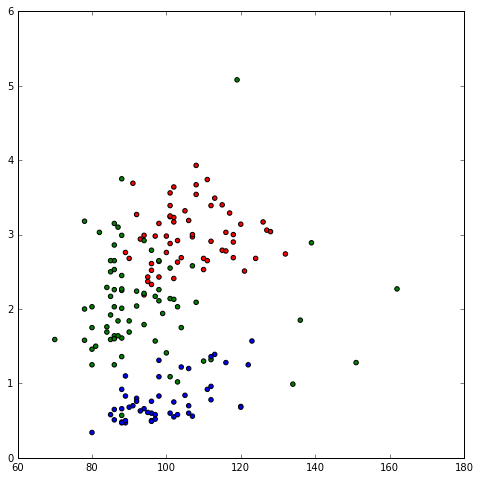

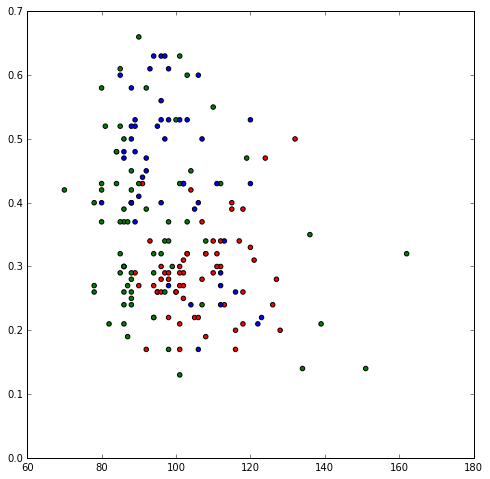

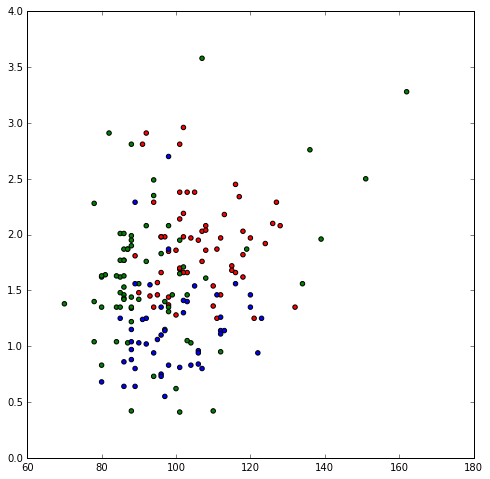

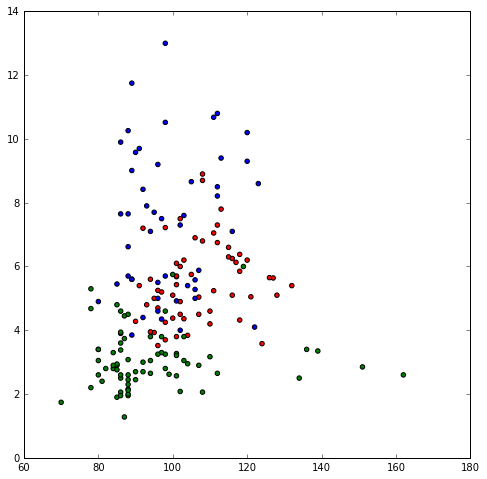

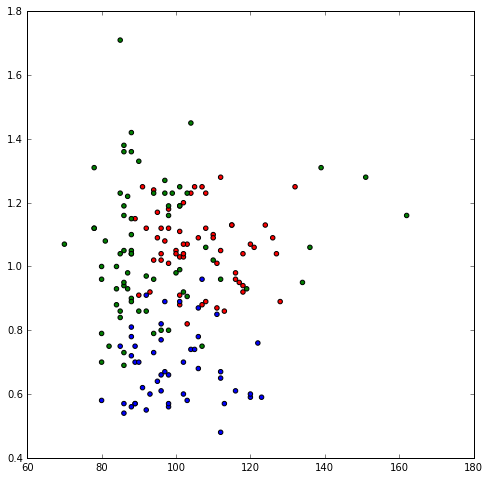

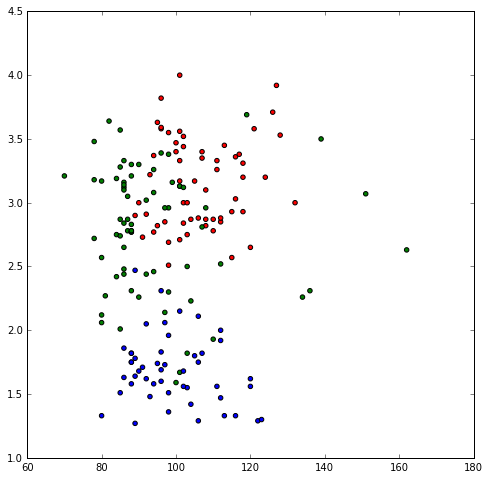

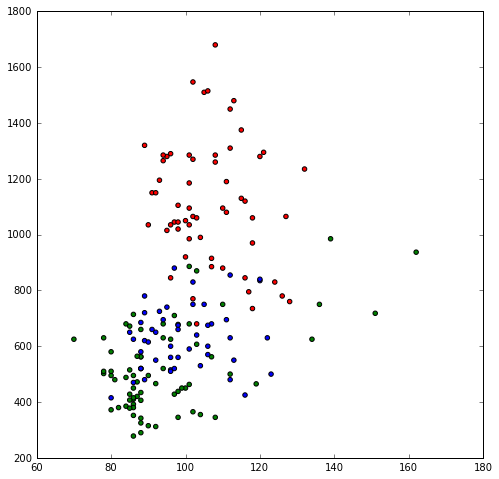

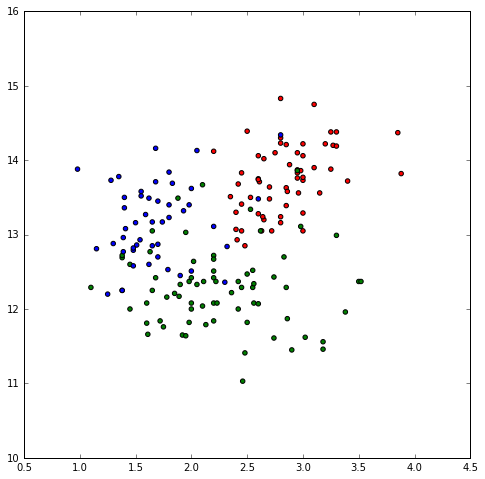

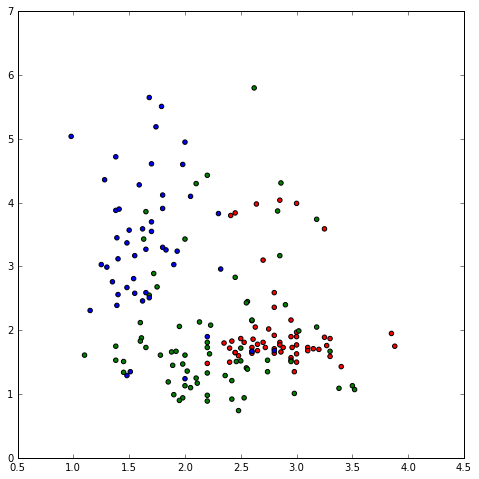

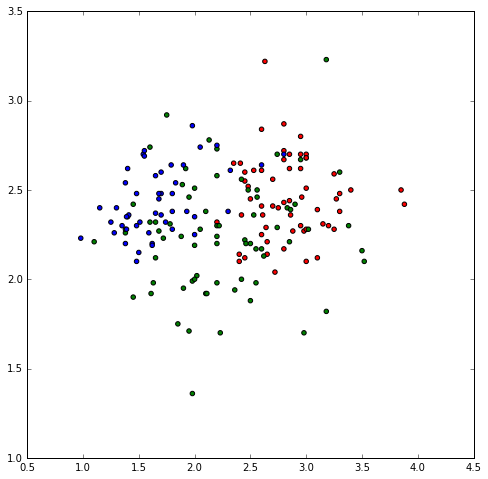

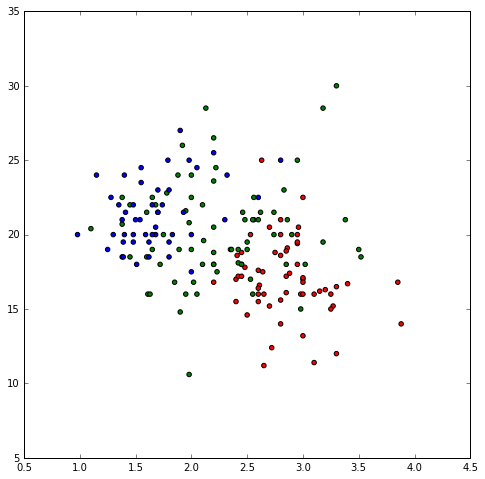

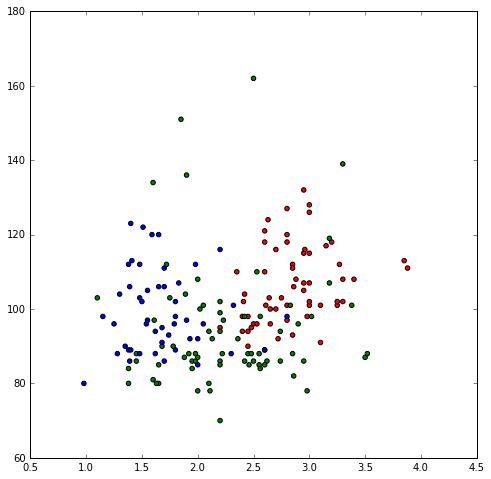

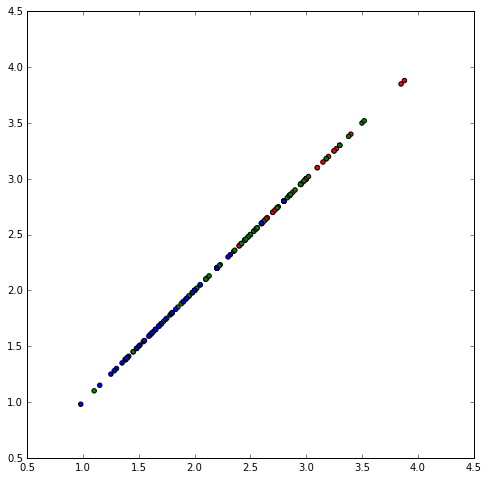

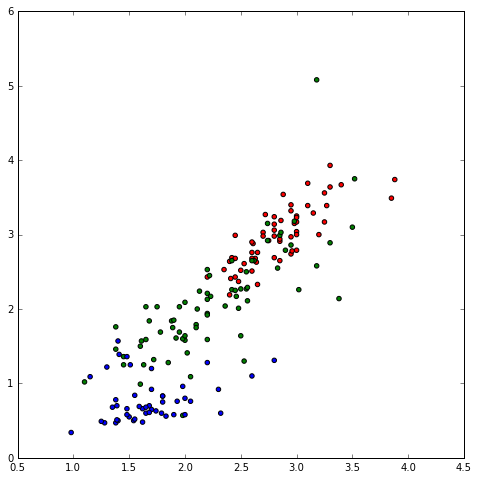

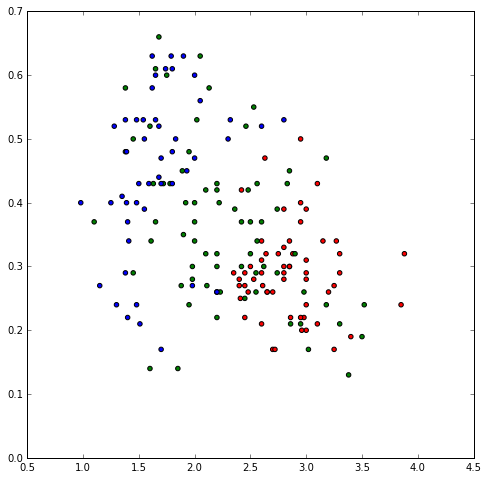

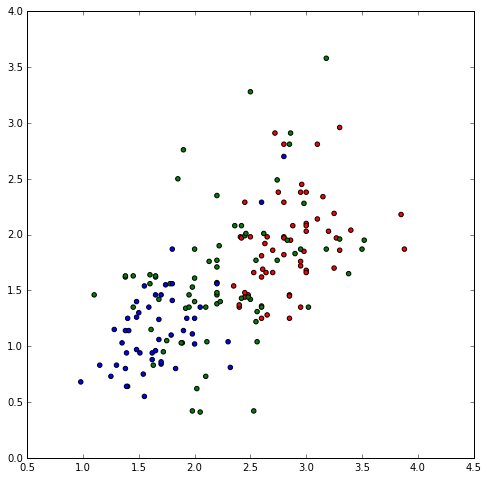

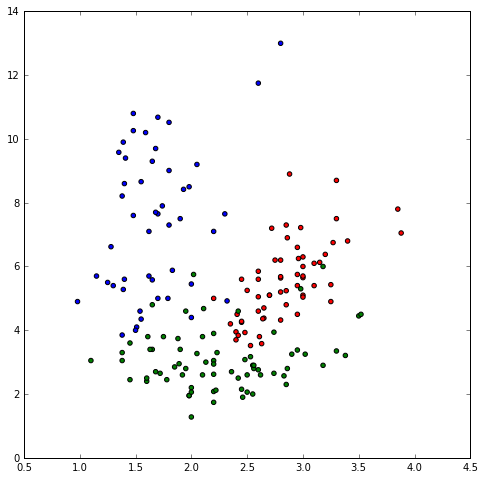

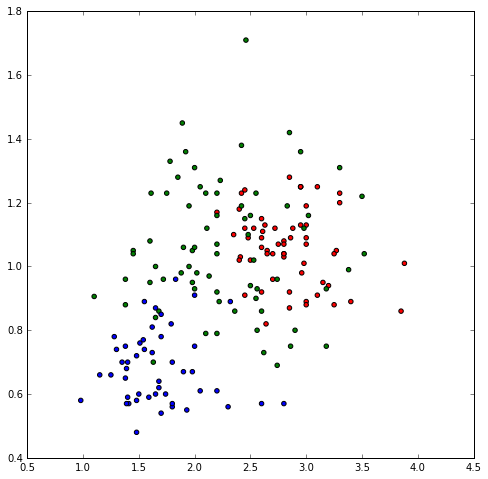

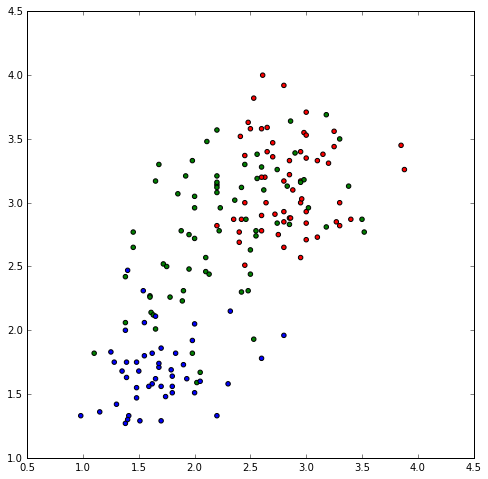

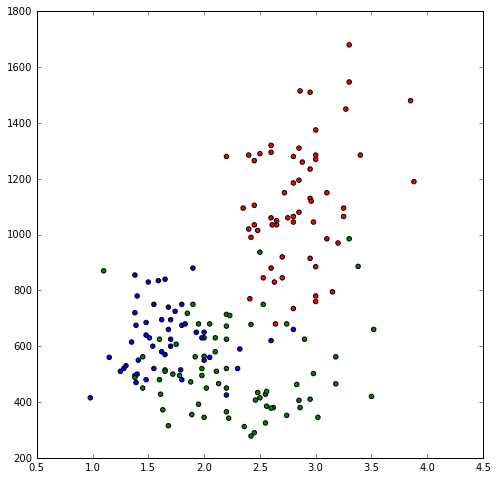

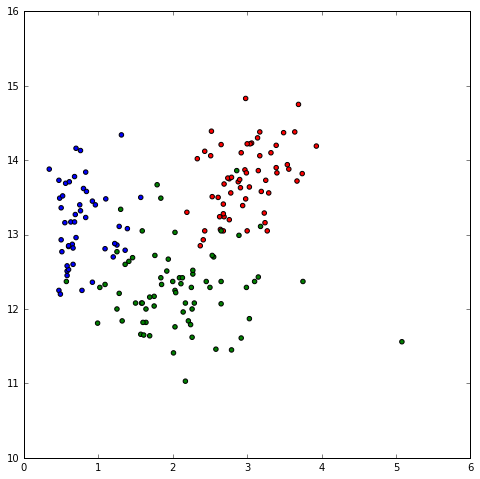

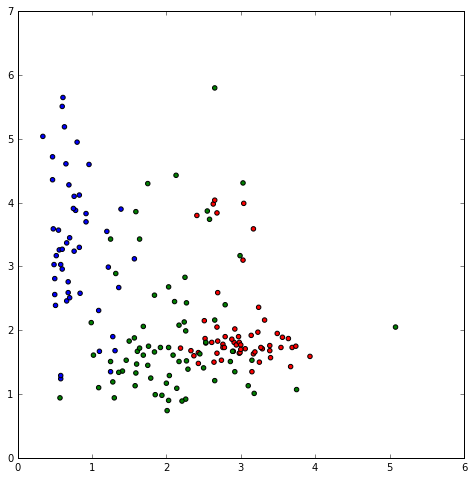

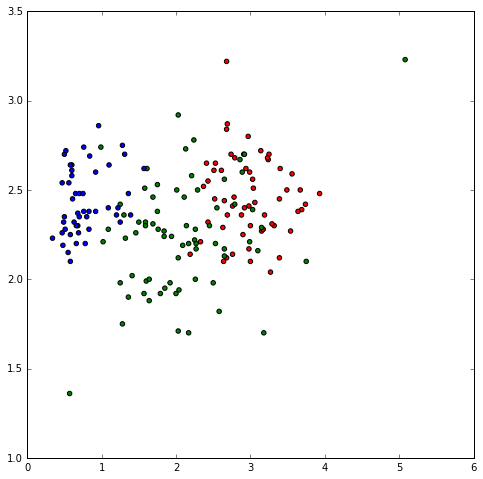

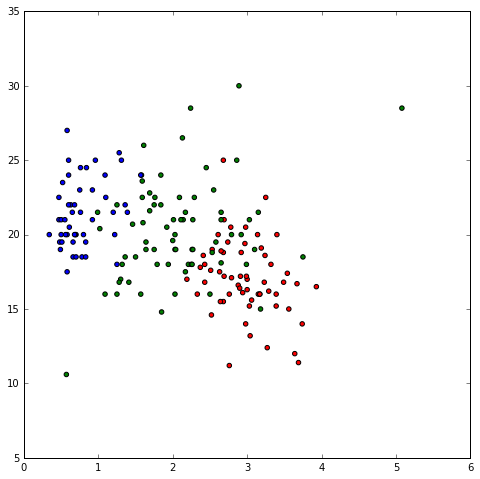

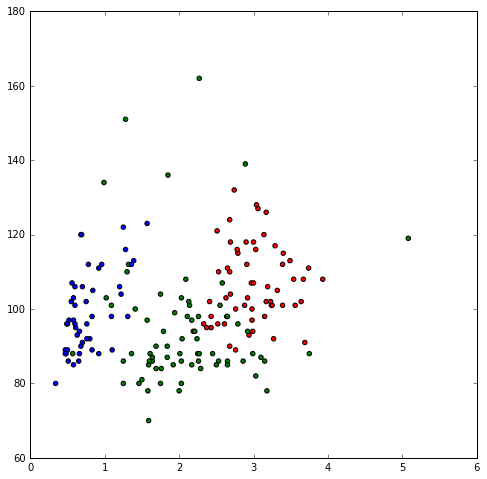

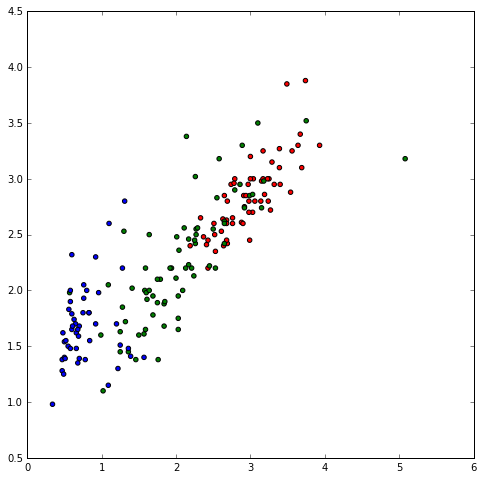

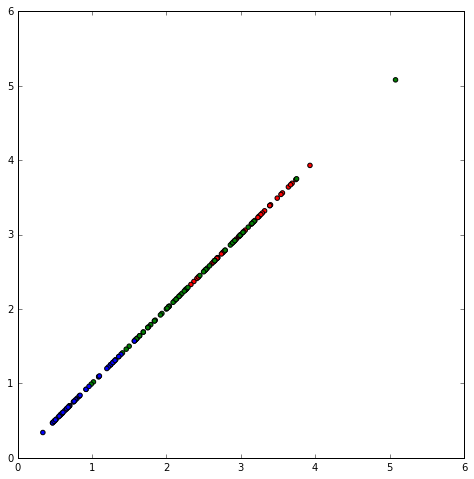

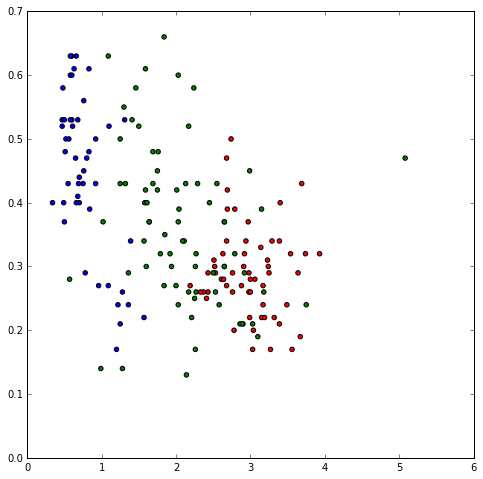

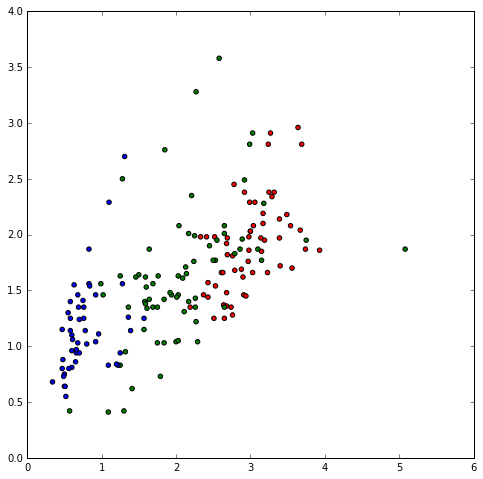

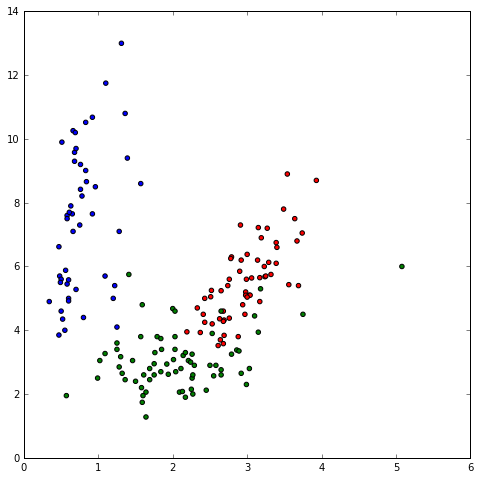

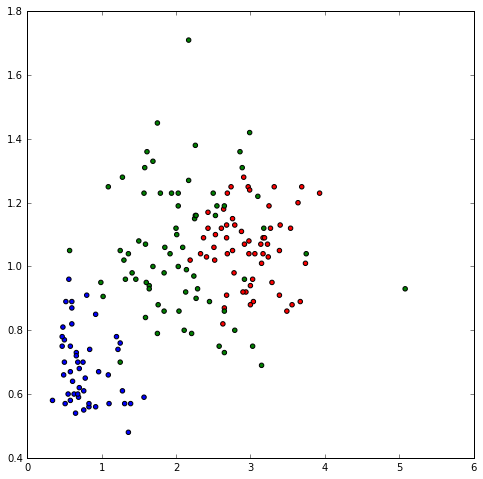

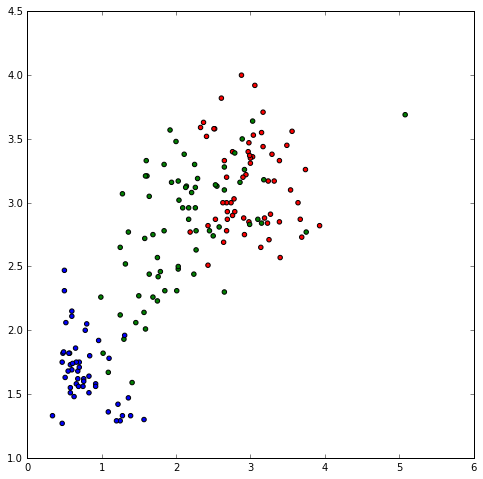

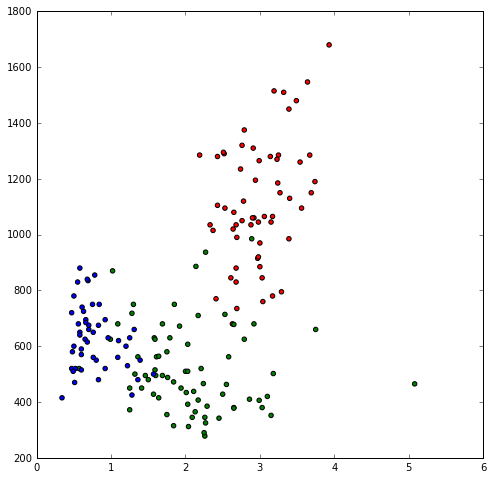

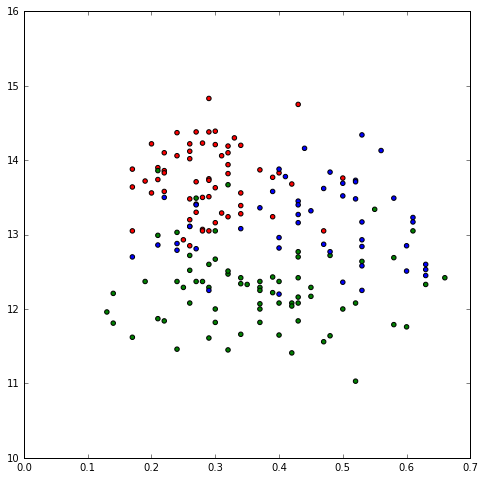

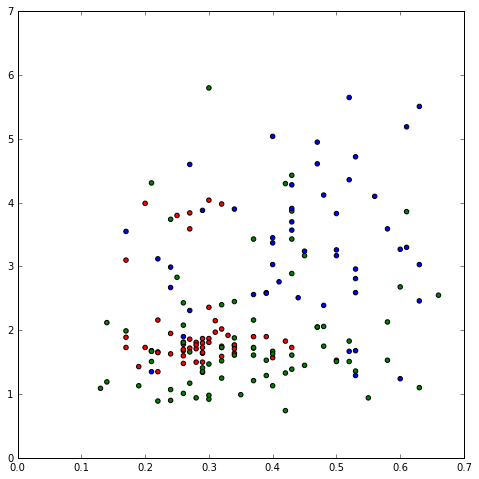

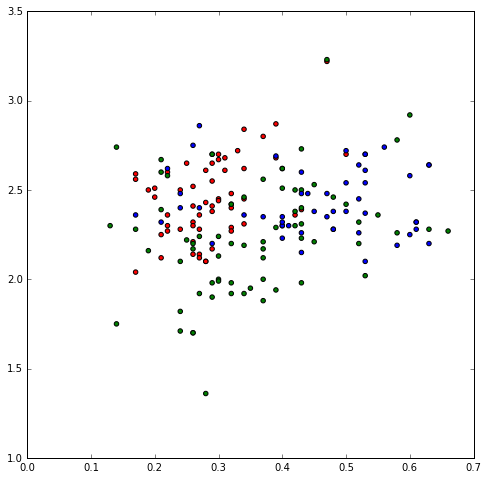

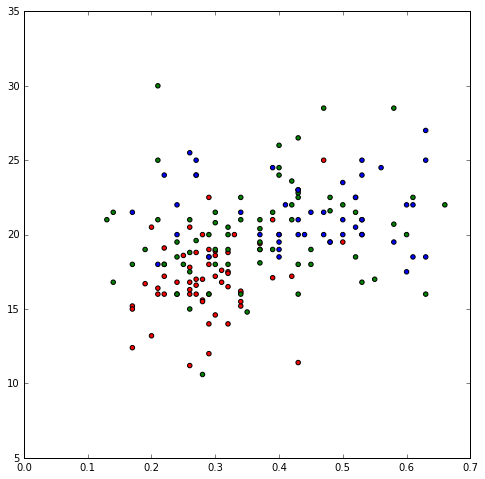

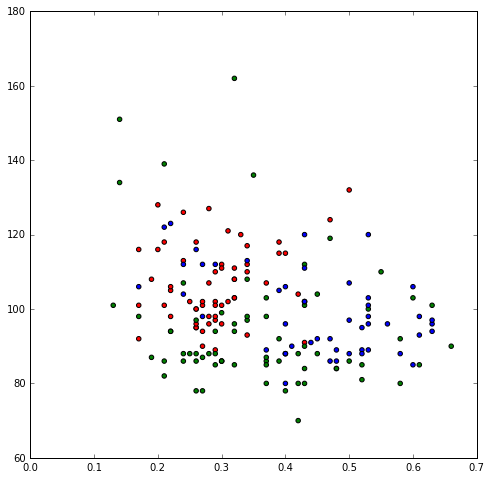

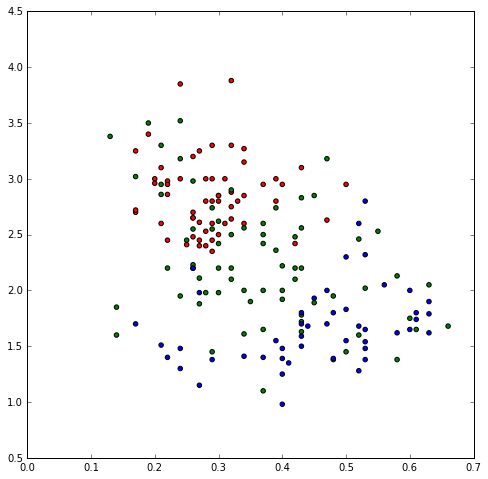

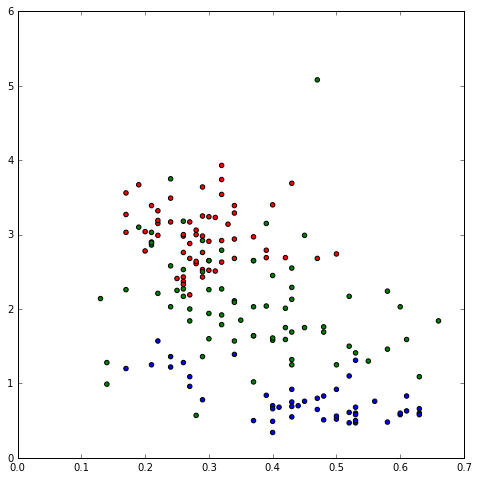

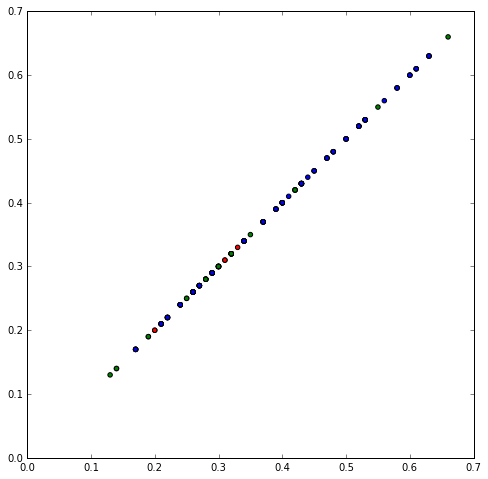

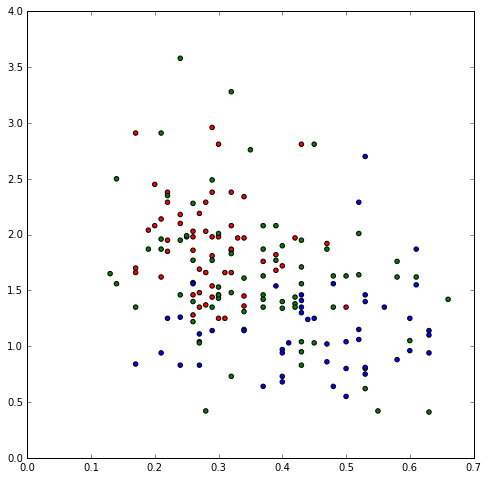

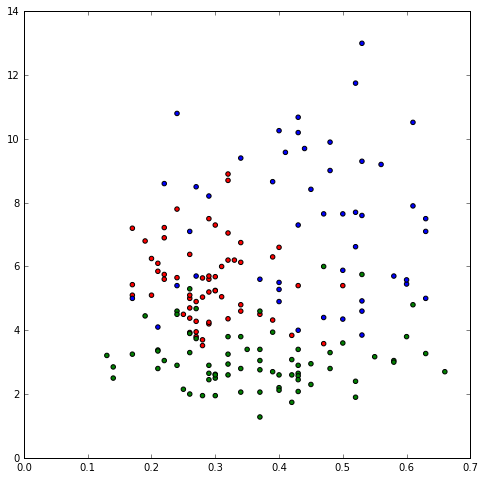

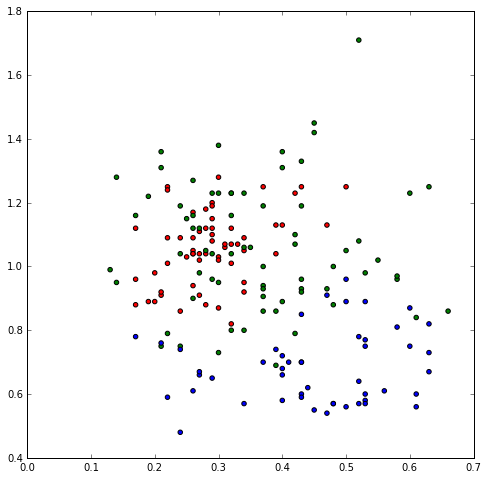

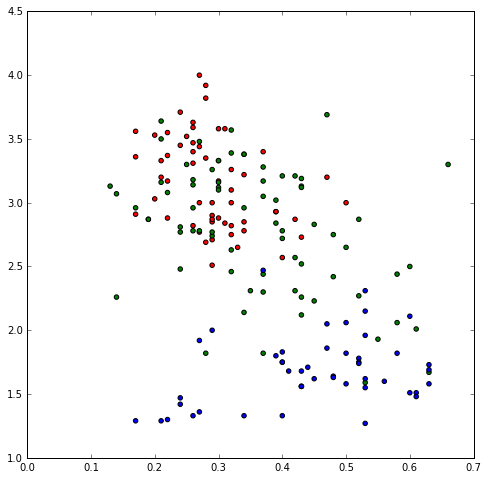

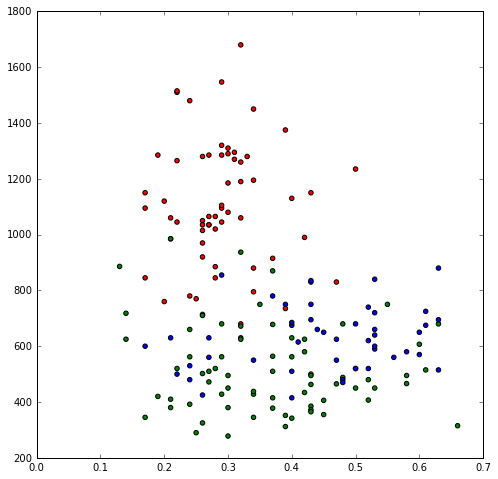

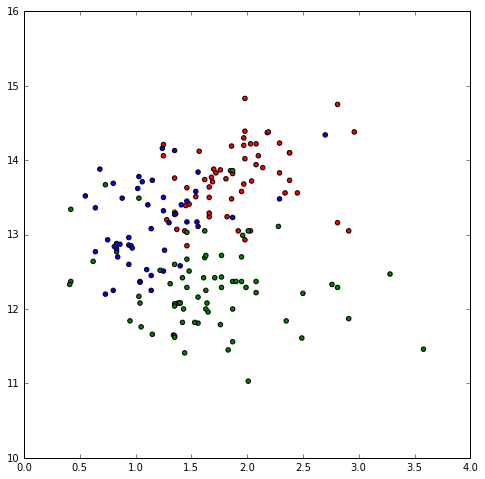

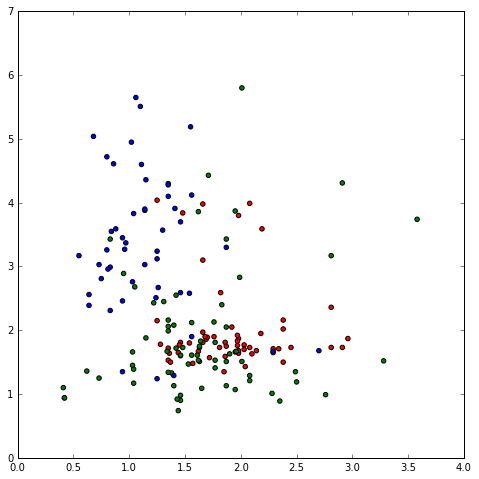

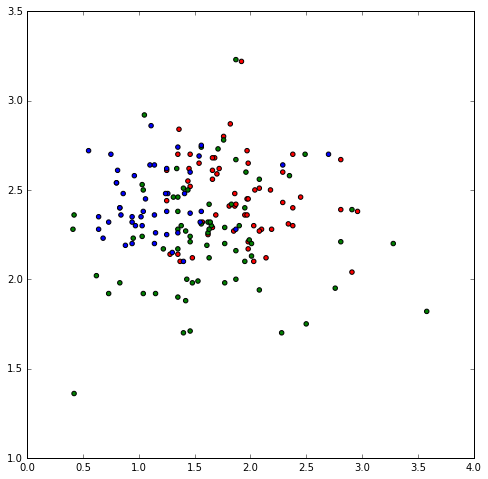

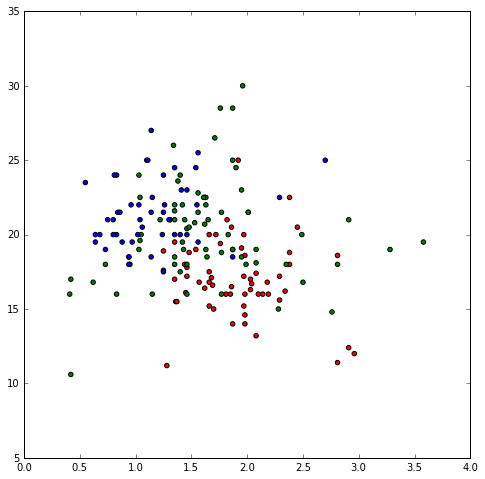

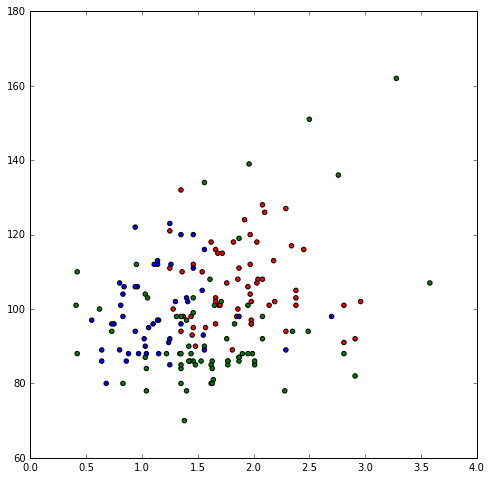

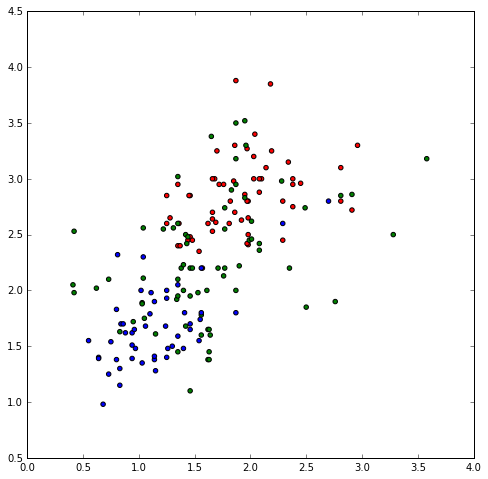

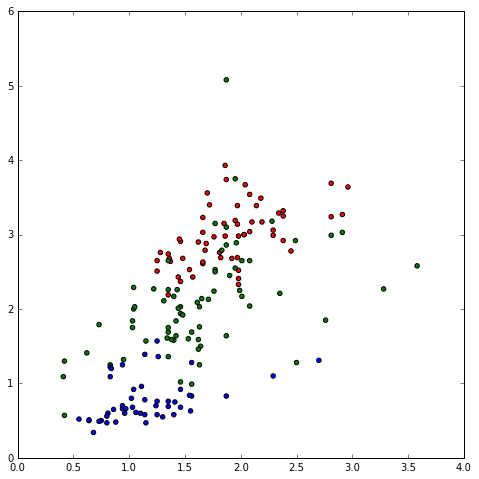

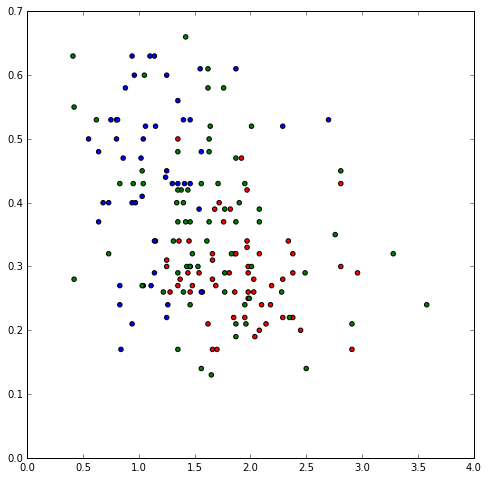

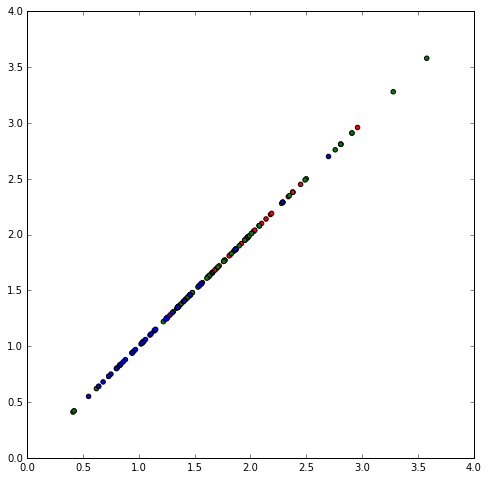

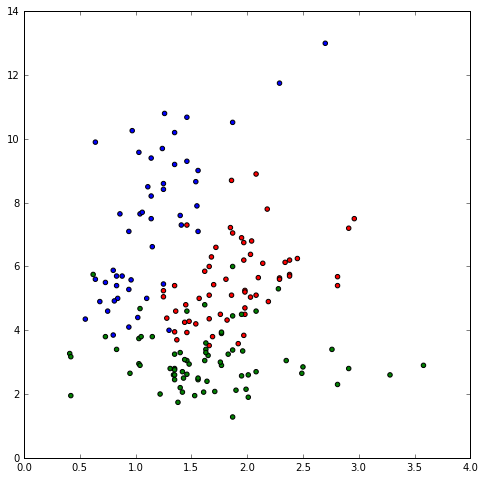

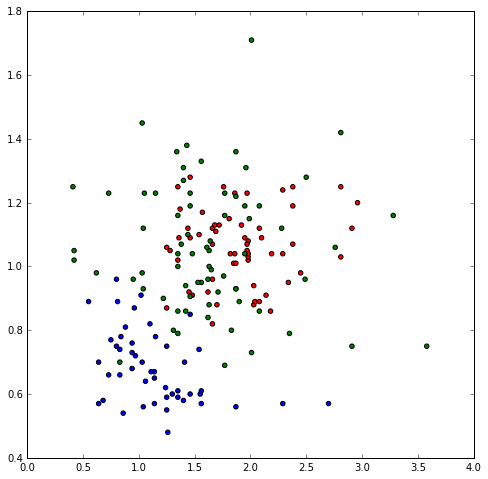

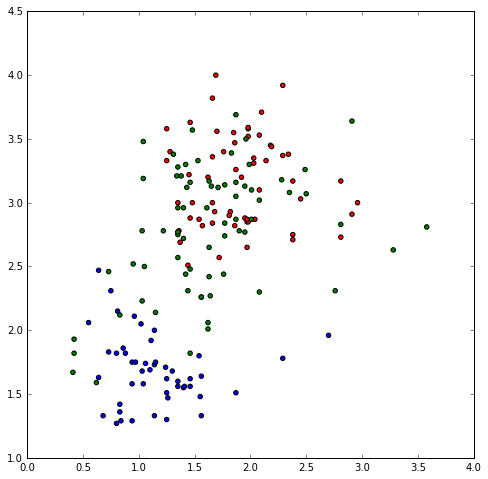

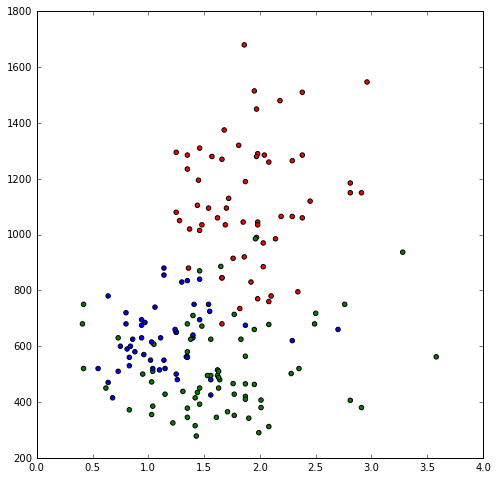

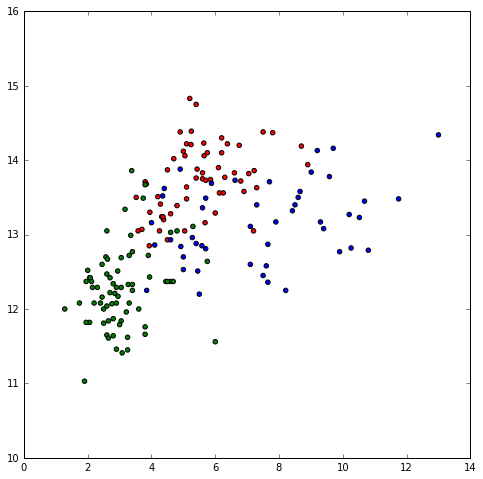

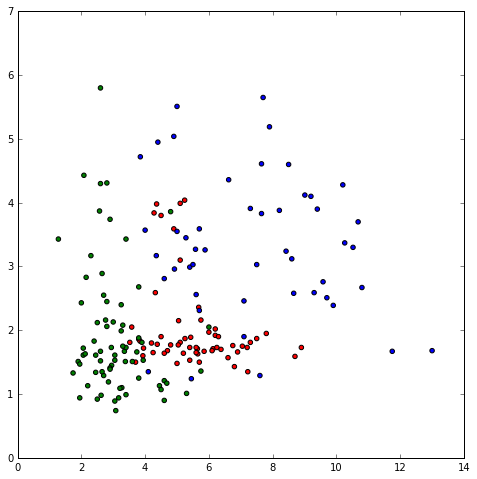

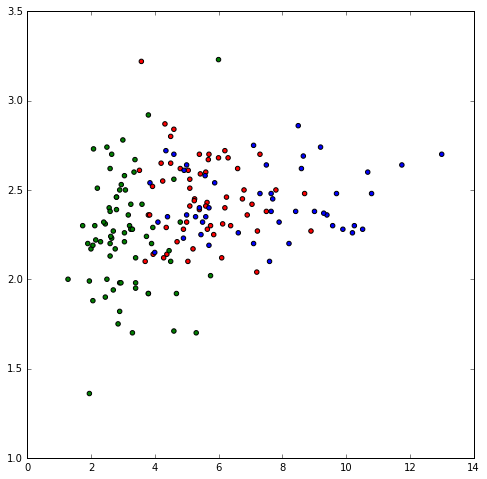

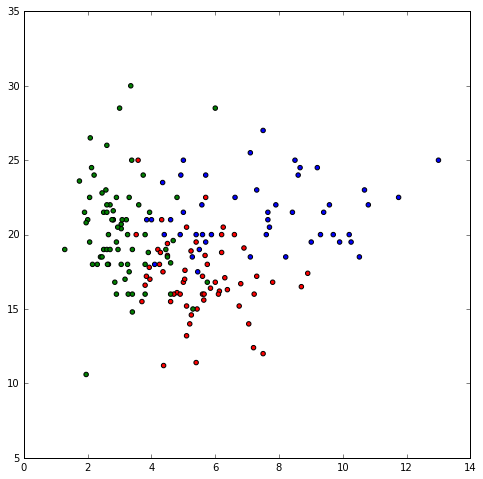

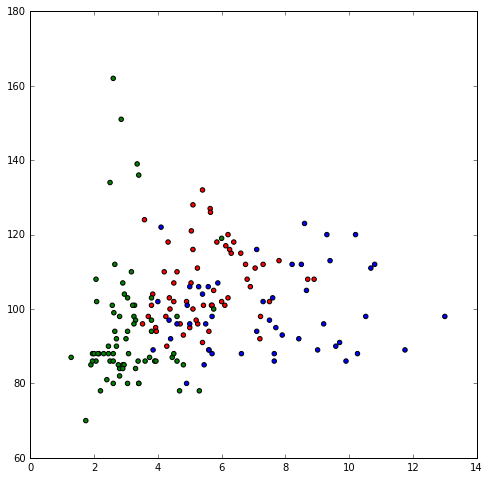

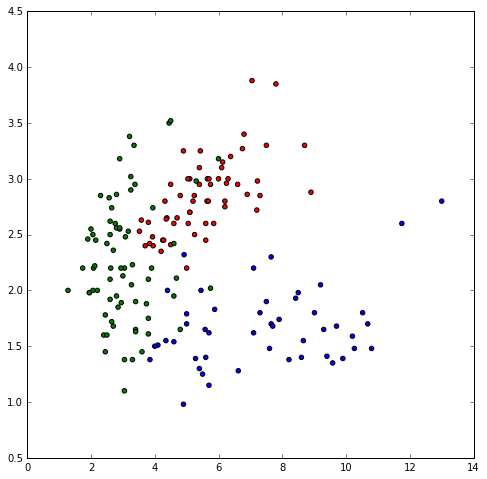

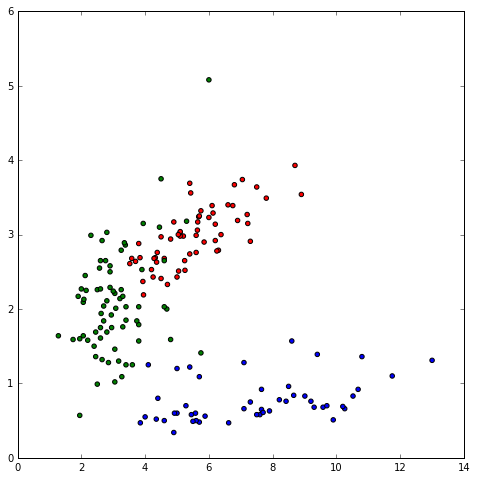

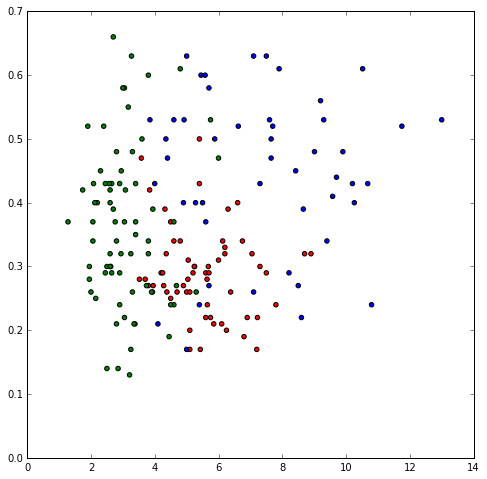

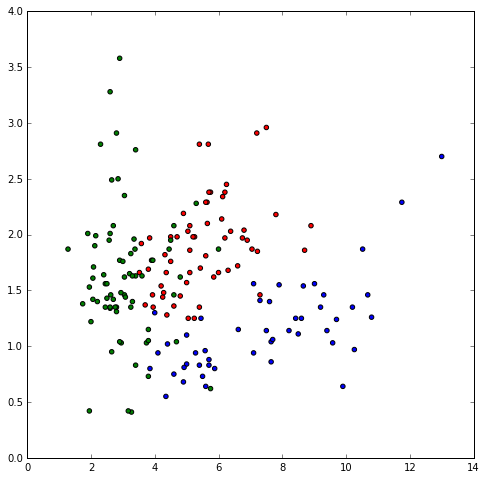

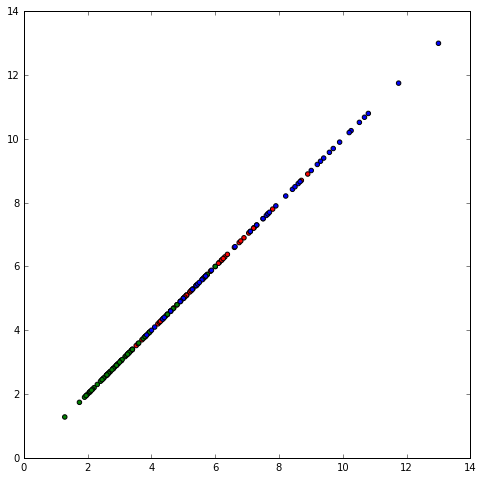

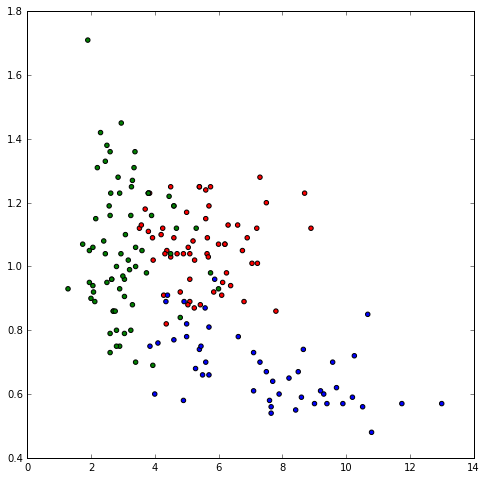

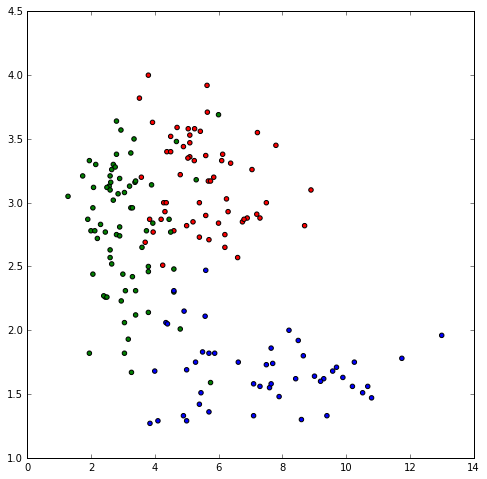

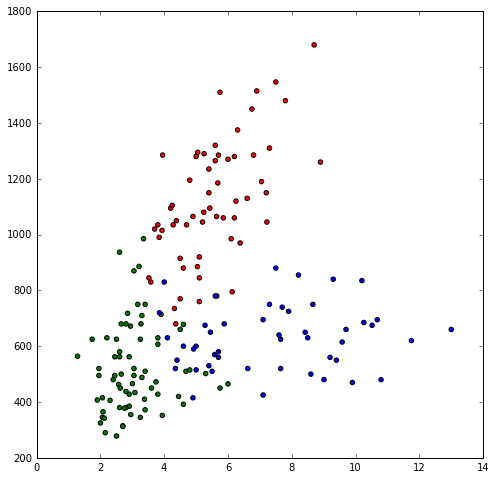

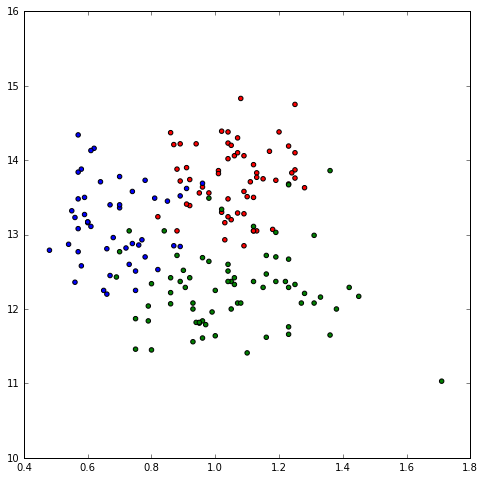

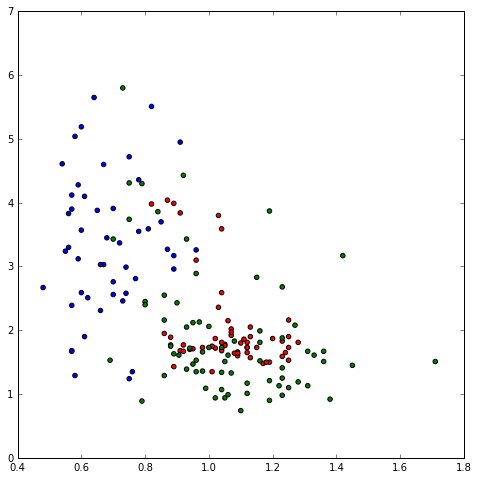

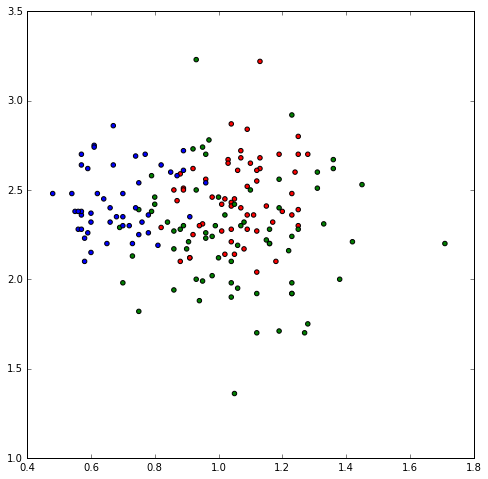

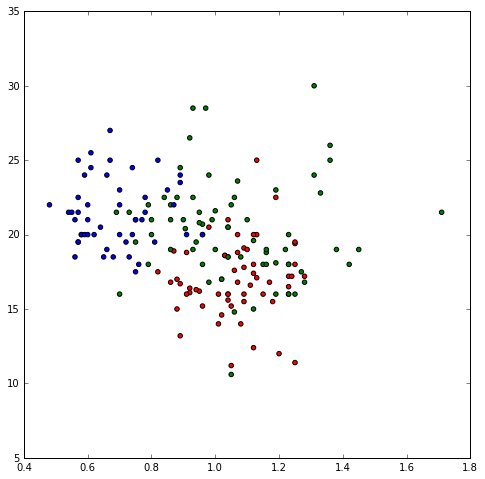

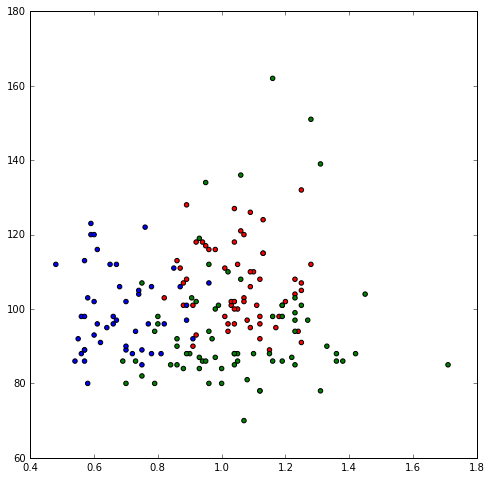

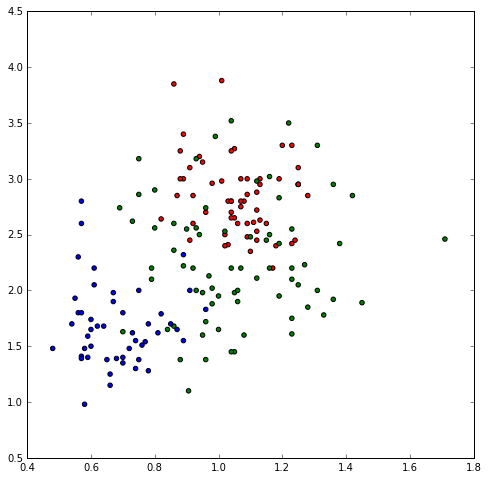

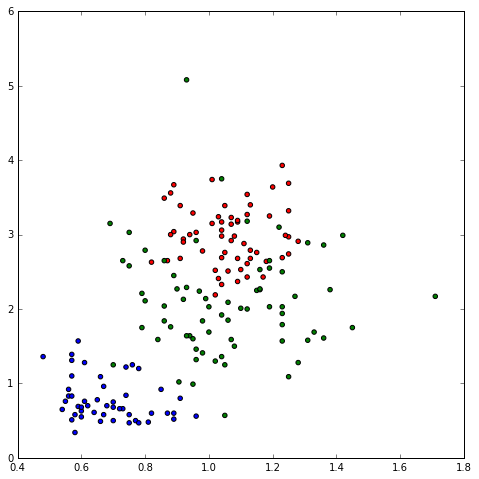

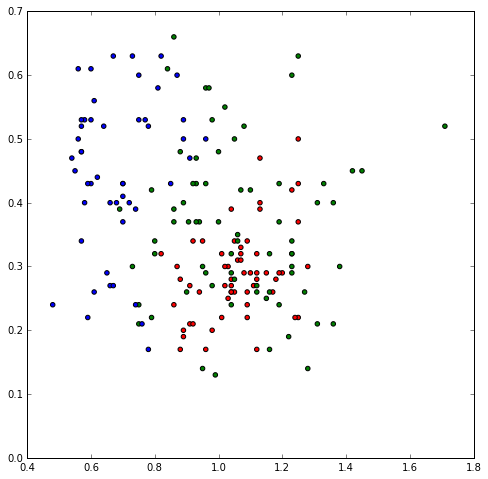

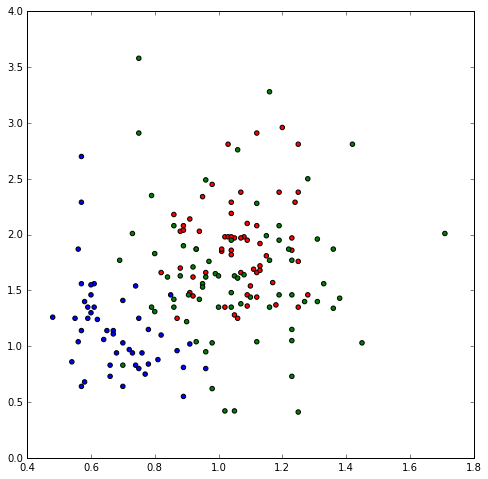

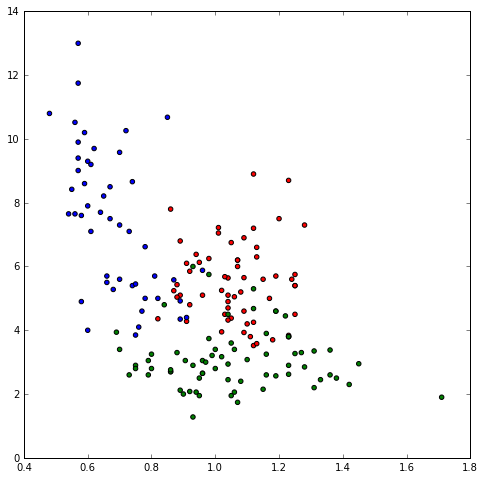

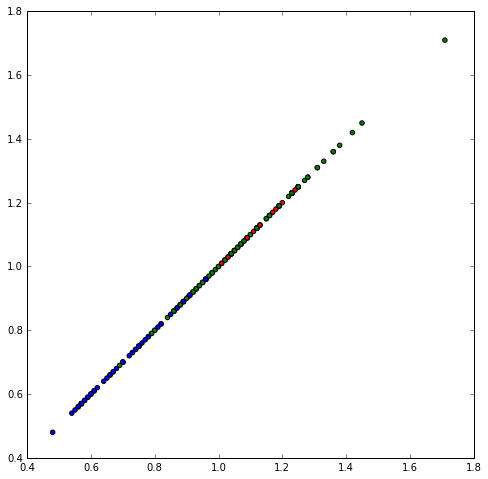

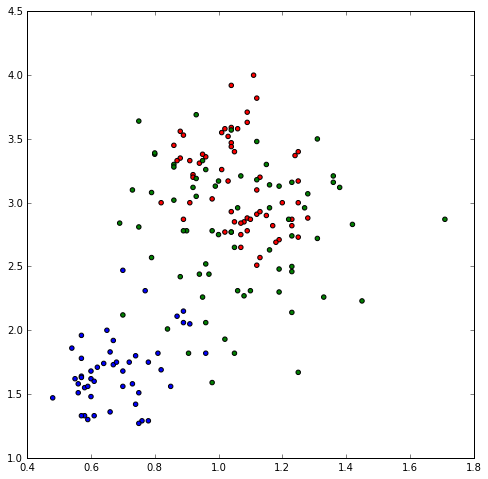

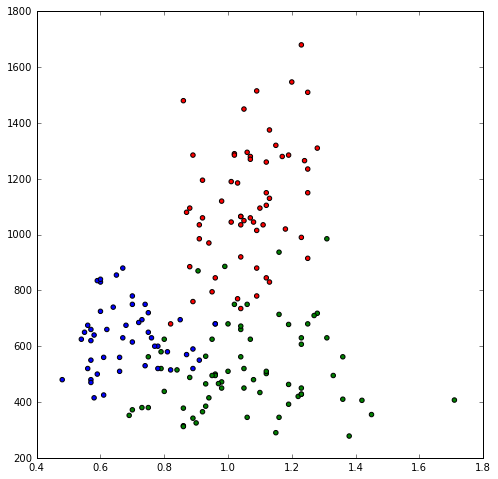

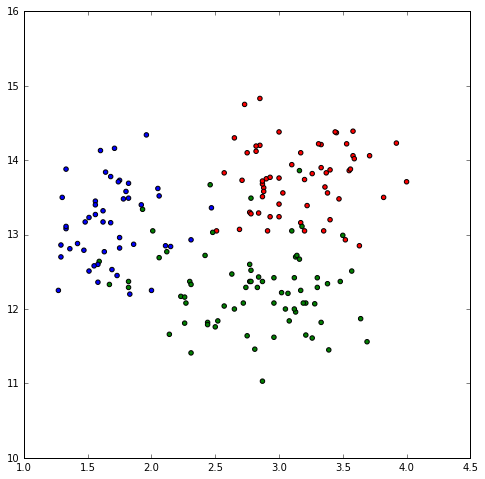

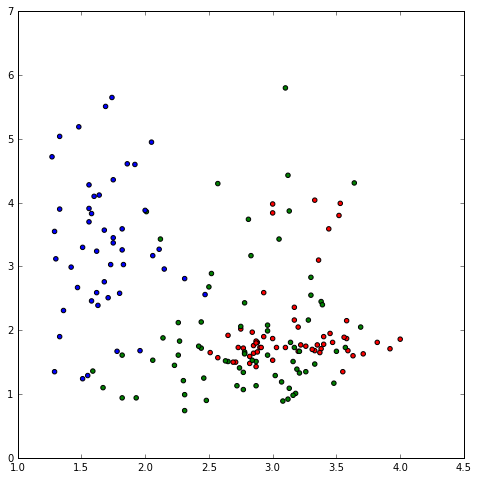

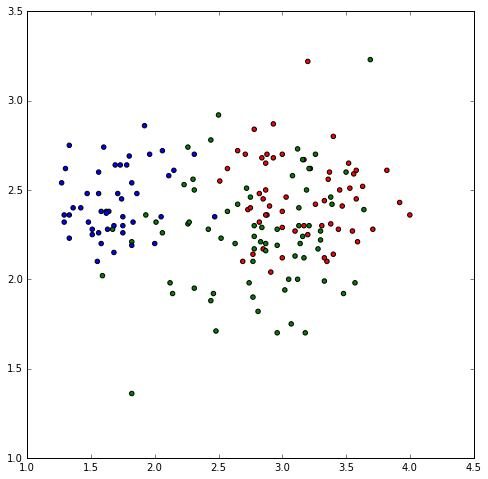

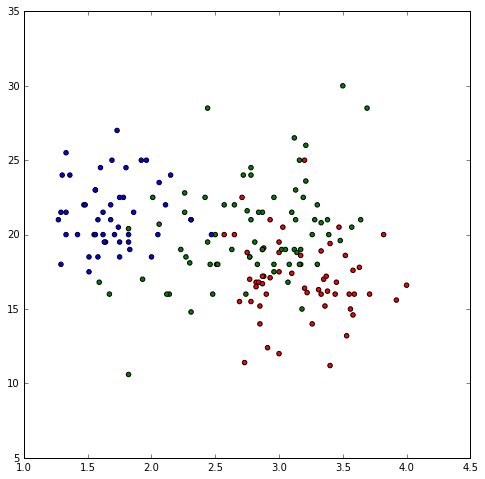

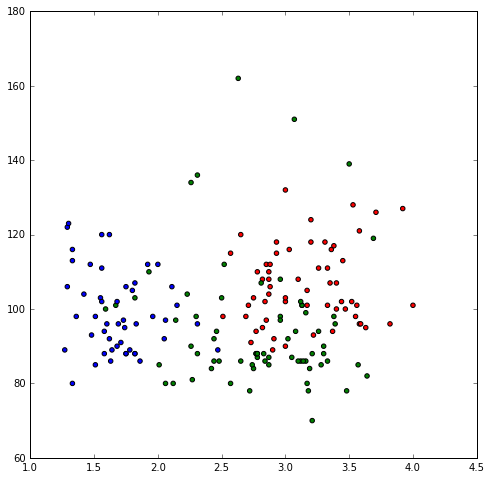

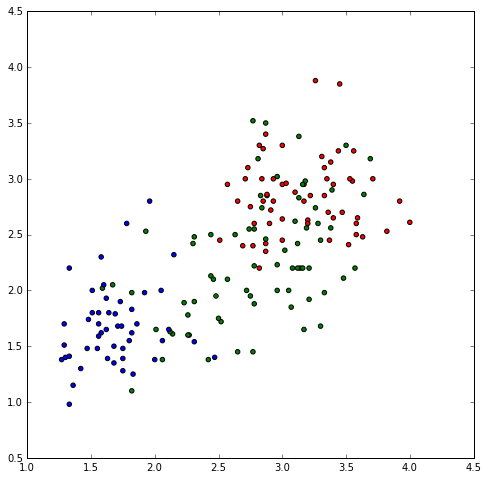

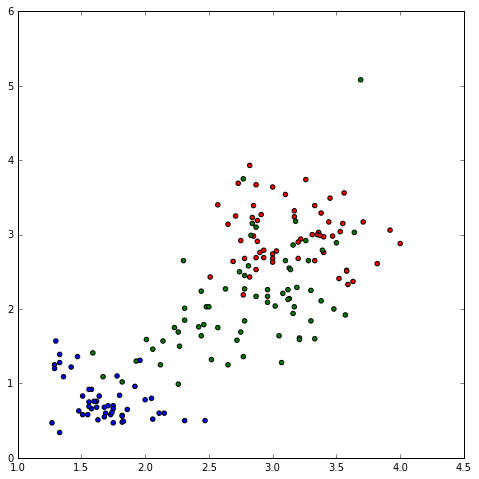

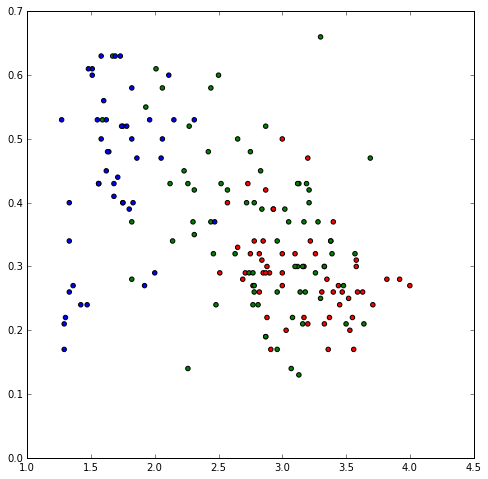

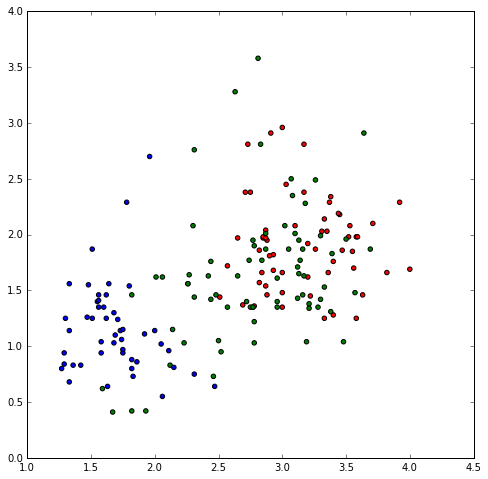

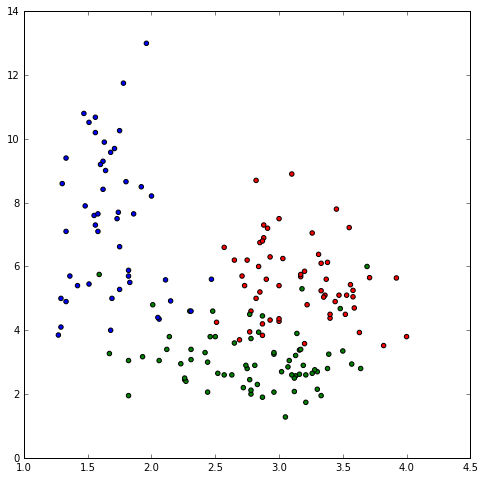

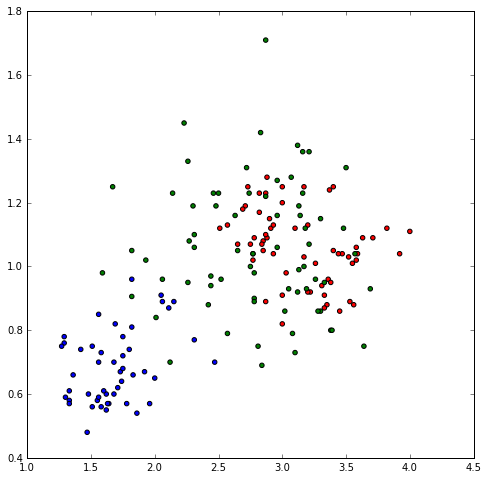

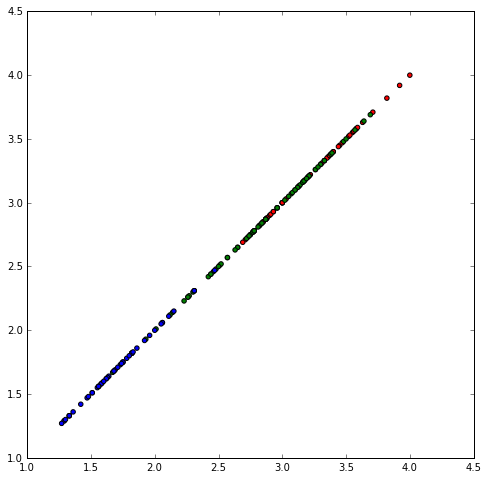

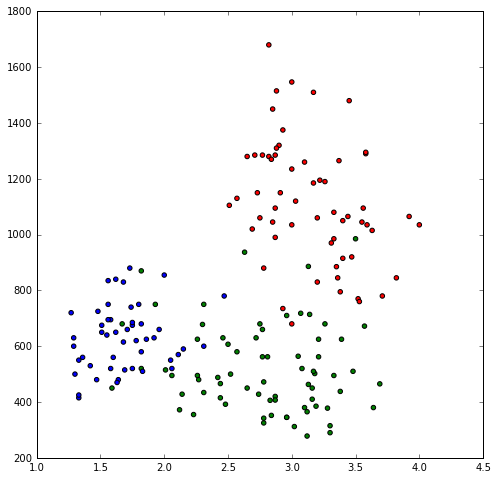

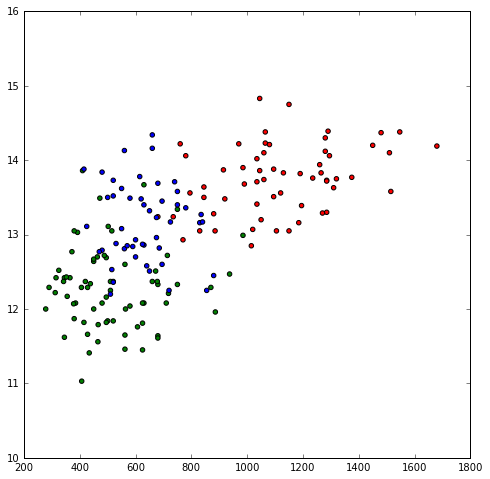

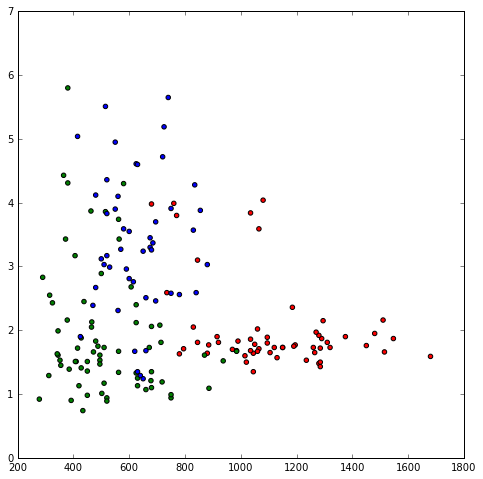

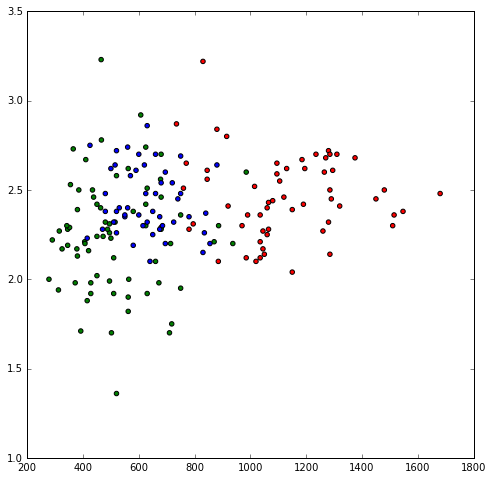

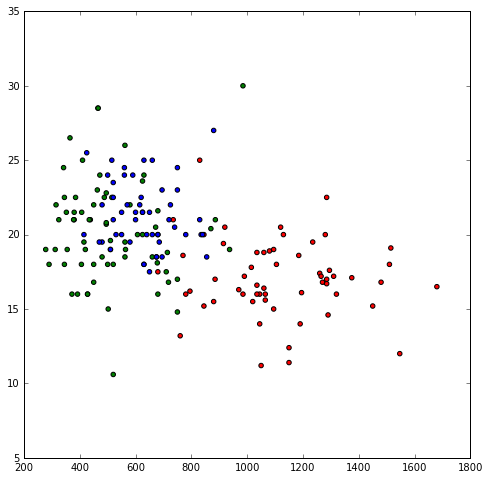

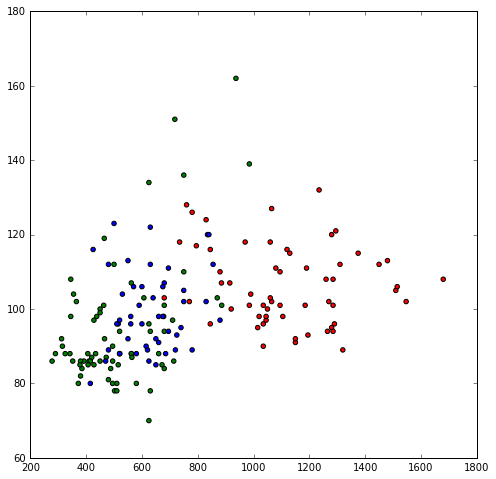

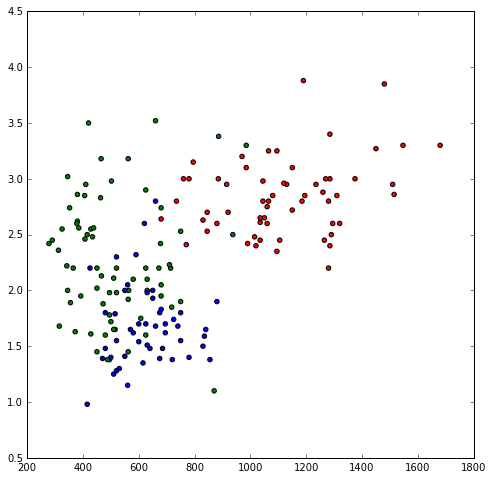

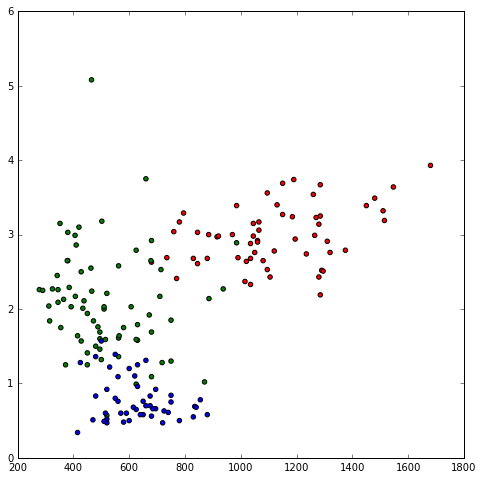

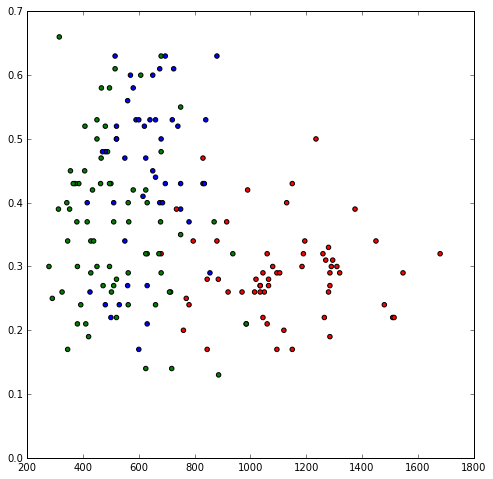

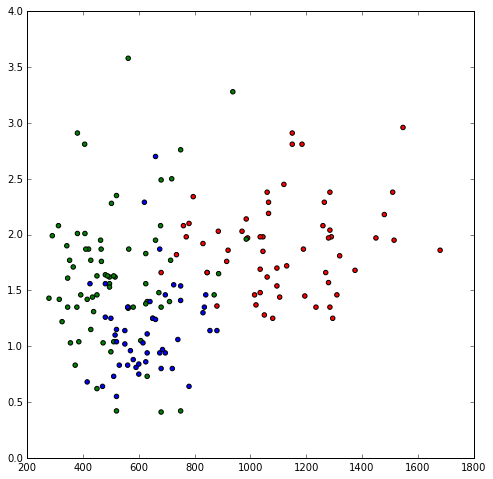

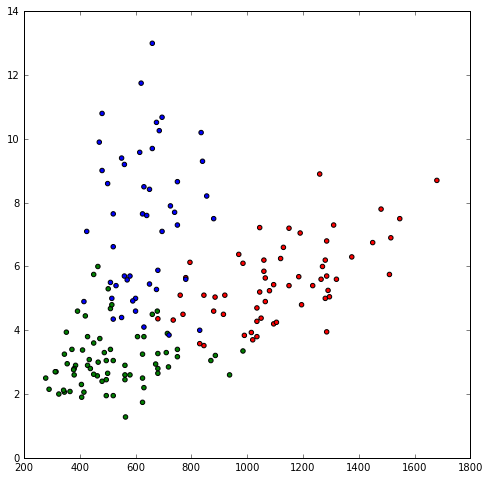

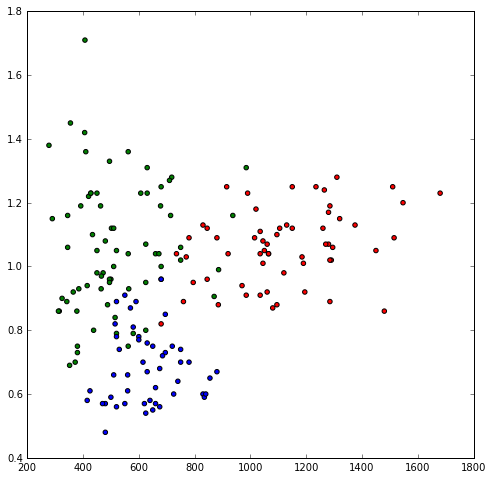

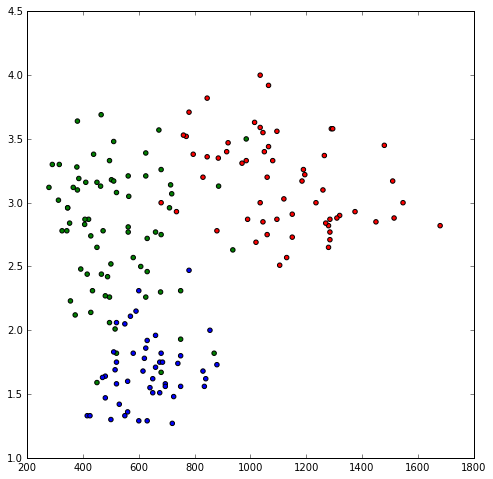

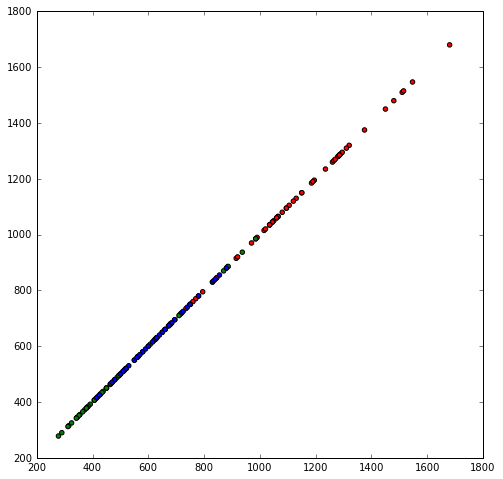

In [21]:
colors = ['red','green','blue']

for i in range(13):
    for j in range(13):
        fig = plt.figure(figsize=(8,8))
        plt.scatter(X[:,i], X[:,j], c=y, cmap=matplotlib.colors.ListedColormap(colors))
        loc = np.arange(0,max(y),max(y)/float(len(colors)))
        
        plt.savefig("{i}_{j}".format(i=i, j=j))